<h3>SNLI Dataset</h3>
<b>Term Paper</b>

<b>Chris Huber\
CS820\
Prof. Kulkari, Spring 2022\
</b> 

In [2]:
import pandas as pd
import numpy as np

import torch

In [3]:
# Download RoBERTa already finetuned for MNLI
roberta = torch.hub.load('pytorch/fairseq', 'roberta.large.mnli')
roberta.eval()  # disable dropout for evaluation

Using cache found in /Users/chrishuber/.cache/torch/hub/pytorch_fairseq_main
2022-03-24 09:38:33 | INFO | fairseq.tasks.text_to_speech | Please install tensorboardX: pip install tensorboardX
2022-03-24 09:38:34 | INFO | fairseq.file_utils | loading archive file http://dl.fbaipublicfiles.com/fairseq/models/roberta.large.mnli.tar.gz from cache at /Users/chrishuber/.cache/torch/pytorch_fairseq/7685ba8546f9a5ce1a00c7a6d7d44f7e748d22681172f0f391c3d48f487c801c.74e37d47306b3cc51c5f8d335022a392c29f1906c8cd9e9cd3446d7422cf55d8
/opt/anaconda3/lib/python3.9/site-packages/hydra/experimental/initialize.py:35: UserWarning: hydra.experimental.initialize() is no longer experimental. Use hydra.initialize()
  deprecation_warning(
/opt/anaconda3/lib/python3.9/site-packages/hydra/experimental/compose.py:18: UserWarning: hydra.experimental.compose() is no longer experimental. Use hydra.compose()
  deprecation_warning(
/opt/anaconda3/lib/python3.9/site-packages/hydra/core/default_element.py:122: UserWarning

RobertaHubInterface(
  (model): RobertaModel(
    (encoder): RobertaEncoder(
      (sentence_encoder): TransformerEncoder(
        (dropout_module): FairseqDropout()
        (embed_tokens): Embedding(50265, 1024, padding_idx=1)
        (embed_positions): LearnedPositionalEmbedding(514, 1024, padding_idx=1)
        (layernorm_embedding): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (layers): ModuleList(
          (0): TransformerEncoderLayerBase(
            (self_attn): MultiheadAttention(
              (dropout_module): FairseqDropout()
              (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
              (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
            )
            (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
            (dr

In [4]:
roberta.register_classification_head('snli', num_classes=3)

In [22]:
train_df = pd.read_csv("./snli/snli_1.0_train.csv")
train_df.head(5)

,gold_label,sentence1_binary_parse,sentence2_binary_parse,sentence1_parse,sentence2_parse,sentence1,sentence2,captionID,pairID,label1,label2,label3,label4,label5
0,neutral,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,( ( A person ) ( ( is ( ( training ( his horse...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.,3416050480.jpg#4,3416050480.jpg#4r1n,neutral,NaN,NaN,NaN,NaN
1,contradiction,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,( ( A person ) ( ( ( ( is ( at ( a diner ) ) )...,(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette.",3416050480.jpg#4,3416050480.jpg#4r1c,contradiction,NaN,NaN,NaN,NaN
2,entailment,( ( ( A person ) ( on ( a horse ) ) ) ( ( jump...,"( ( A person ) ( ( ( ( is outdoors ) , ) ( on ...",(ROOT (S (NP (NP (DT A) (NN person)) (PP (IN o...,(ROOT (S (NP (DT A) (NN person)) (VP (VBZ is) ...,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse.",3416050480.jpg#4,3416050480.jpg#4r1e,entailment,NaN,NaN,NaN,NaN
3,neutral,( Children ( ( ( smiling and ) waving ) ( at c...,( They ( are ( smiling ( at ( their parents ) ...,(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,(ROOT (S (NP (PRP They)) (VP (VBP are) (VP (VB...,Children smiling and waving at camera,They are smiling at their parents,2267923837.jpg#2,2267923837.jpg#2r1n,neutral,NaN,NaN,NaN,NaN
4,entailment,( Children ( ( ( smiling and ) waving ) ( at c...,( There ( ( are children ) present ) ),(ROOT (NP (S (NP (NNP Children)) (VP (VBG smil...,(ROOT (S (NP (EX There)) (VP (VBP are) (NP (NN...,Children smiling and waving at camera,There are children present,2267923837.jpg#2,2267923837.jpg#2r1e,entailment,NaN,NaN,NaN,NaN


In [23]:
print(train_df.shape[0])

550152


In [26]:
# take subset of train due to processing time limitations
train_df = train_df.head(10000)

In [27]:
print(train_df.shape[0])

10000


In [11]:
# TO-DO: ONCE MODEL TRAINING METHOD IS NAILED DOWN
# from sklearn.model_selection import train_test_split

# # create a train-test split using the labelled train data so we can test F!
# train, test = train_test_split(train_df, test_size=0.2)

# print(train.shape[0])
# print(test.shape[0])

In [28]:
sentences1 = list(train_df['sentence1'])
sentences2 = list(train_df['sentence2'])
train_pair_ids = list(train_df['pairID'])

In [29]:
train_s1 = train_df['sentence1']
train_s2 = train_df['sentence2']
print(train_s1[0])
print(train_s2[0])

A person on a horse jumps over a broken down airplane.
A person is training his horse for a competition.


In [30]:
%%time

# initialize counters
count_c = 0
count_e = 0
count_n = 0

# This uses the pretrained Roberta MLNI model to make predictions about what class the two sentences are and assigns the output to a list
train_preds = []
with torch.no_grad():
    for k in range(len(train_s1)):
        # Encode a pair of sentences and make a prediction
        print("Pair " + str(k) + ":")
        print(train_s1[k], train_s2[k])
        tokens = roberta.encode(train_s1[k], train_s2[k])
        prediction = roberta.predict('mnli', tokens).argmax().item()
        
        # make sublist from pairIDs and semantic prediction
        train_pred = []
        train_pred.append(train_pair_ids[k])
        
        # 0 is a contradiction, 1 is neutral, and 2 is an entailment
        if prediction == 0:
            train_pred.append("contradiction")
            count_c += 1
        elif prediction == 2:
            train_pred.append("entailment")
            count_e += 1
        else:
            train_pred.append("neutral")
            count_n += 1
        train_preds.append(train_pred)
        print(prediction)
        print("-----------------")

print("done!")

Pair 0:
A person on a horse jumps over a broken down airplane. A person is training his horse for a competition.
1
-----------------
Pair 1:
A person on a horse jumps over a broken down airplane. A person is at a diner, ordering an omelette.
0
-----------------
Pair 2:
A person on a horse jumps over a broken down airplane. A person is outdoors, on a horse.
2
-----------------
Pair 3:
Children smiling and waving at camera They are smiling at their parents
1
-----------------
Pair 4:
Children smiling and waving at camera There are children present
2
-----------------
Pair 5:
Children smiling and waving at camera The kids are frowning
0
-----------------
Pair 6:
A boy is jumping on skateboard in the middle of a red bridge. The boy skates down the sidewalk.
0
-----------------
Pair 7:
A boy is jumping on skateboard in the middle of a red bridge. The boy does a skateboarding trick.
1
-----------------
Pair 8:
A boy is jumping on skateboard in the middle of a red bridge. The boy is wearing s

1
-----------------
Pair 59:
Woman in white in foreground and a man slightly behind walking with a sign for John's Pizza and Gyro in the background. A woman in white.
2
-----------------
Pair 60:
Woman in white in foreground and a man slightly behind walking with a sign for John's Pizza and Gyro in the background. A man is advertising for a restaurant.
2
-----------------
Pair 61:
Woman in white in foreground and a man slightly behind walking with a sign for John's Pizza and Gyro in the background. The woman is wearing black.
0
-----------------
Pair 62:
Woman in white in foreground and a man slightly behind walking with a sign for John's Pizza and Gyro in the background. A man and a woman walk down a crowded city street.
1
-----------------
Pair 63:
Woman in white in foreground and a man slightly behind walking with a sign for John's Pizza and Gyro in the background. The woman is wearing white.
2
-----------------
Pair 64:
Woman in white in foreground and a man slightly behind walking

2
-----------------
Pair 98:
A woman is walking across the street eating a banana, while a man is following with his briefcase. An actress and her favorite assistant talk a walk in the city.
1
-----------------
Pair 99:
A woman is walking across the street eating a banana, while a man is following with his briefcase. a woman eating a banana crosses a street
2
-----------------
Pair 100:
A woman is walking across the street eating a banana, while a man is following with his briefcase. the woman is a seductress
1
-----------------
Pair 101:
A woman is walking across the street eating a banana, while a man is following with his briefcase. a woman sits for lunch
0
-----------------
Pair 102:
A woman is walking across the street eating a banana, while a man is following with his briefcase. the woman is having coffee at the cafe
0
-----------------
Pair 103:
A woman is walking across the street eating a banana, while a man is following with his briefcase. The woman is eating a banana.
2
----

2
-----------------
Pair 164:
Children going home from school. The children are walking in the afternooon.
1
-----------------
Pair 165:
People listening to a choir in a Catholic church. People are listening to a metal band.
0
-----------------
Pair 166:
People listening to a choir in a Catholic church. Choir singing in mass.
2
-----------------
Pair 167:
People listening to a choir in a Catholic church. People are in mass for a first communion
1
-----------------
Pair 168:
Bicyclists waiting at an intersection. A bicyclist is sitting down having lunch at the mall.
0
-----------------
Pair 169:
Bicyclists waiting at an intersection. The bicyclists are outside.
2
-----------------
Pair 170:
Bicyclists waiting at an intersection. Bicyclists waiting for a car to pass.
2
-----------------
Pair 171:
Bicyclists waiting at an intersection. A person on a bike is waiting while the light is green.
1
-----------------
Pair 172:
Bicyclists waiting at an intersection. The bicycles are on a road.
2


1
-----------------
Pair 230:
A boy is drinking out of a water fountain shaped like a woman. A man is drinking lemonade from a glass.
0
-----------------
Pair 231:
three bikers stop in town. cars stop in town
2
-----------------
Pair 232:
three bikers stop in town. Bikers stop in towns
2
-----------------
Pair 233:
three bikers stop in town. A town has witnessed the arrival of three bikers.
2
-----------------
Pair 234:
three bikers stop in town. Thoes bikers are slowing down
2
-----------------
Pair 235:
three bikers stop in town. The bikers are riding Harley's.
1
-----------------
Pair 236:
three bikers stop in town. Three bikers are going 100 mph
0
-----------------
Pair 237:
three bikers stop in town. The bikers breathe water
1
-----------------
Pair 238:
three bikers stop in town. Bikers stop for gas
1
-----------------
Pair 239:
three bikers stop in town. Three bicyclists are riding in a pack.
1
-----------------
Pair 240:
three bikers stop in town. There is a very angry dog.
0
-

0
-----------------
Pair 288:
A family with a baby, the father is wearing a save the children sign. Three adults are pictured.
2
-----------------
Pair 289:
A family with a baby, the father is wearing a save the children sign. A man is wearing something with writing on it.
2
-----------------
Pair 290:
A family with a baby, the father is wearing a save the children sign. A woman is holding a baby.
0
-----------------
Pair 291:
A foreign family is walking along a dirt path next to the water. they are riding a bike
0
-----------------
Pair 292:
A foreign family is walking along a dirt path next to the water. People are walking next to a lake.
2
-----------------
Pair 293:
A foreign family is walking along a dirt path next to the water. A foreigner group of cousins hike along a trail next to a stream.
1
-----------------
Pair 294:
A foreign family is walking along a dirt path next to the water. A foreign family walks by a dirt trail along a body of water.
2
-----------------
Pair 295:
A f

2
-----------------
Pair 335:
A man squatting in the foreground of a photograph while taking a photograph of his own of a man doing a skateboarding kick flip in midair above a short flight of stairs outdoors. People take photos outdoors while a man performs exciting skateboarding tricks.
2
-----------------
Pair 336:
A man squatting in the foreground of a photograph while taking a photograph of his own of a man doing a skateboarding kick flip in midair above a short flight of stairs outdoors. A man is photographing another man.
2
-----------------
Pair 337:
A man squatting in the foreground of a photograph while taking a photograph of his own of a man doing a skateboarding kick flip in midair above a short flight of stairs outdoors. A pro photographer is taking pictures of a pro skater.
1
-----------------
Pair 338:
A man squatting in the foreground of a photograph while taking a photograph of his own of a man doing a skateboarding kick flip in midair above a short flight of stairs out

2
-----------------
Pair 387:
Two ladies are reading through binders. Two ladies are studying for their final exam.
1
-----------------
Pair 388:
Two ladies are reading through binders. The girls are watching a movie.
0
-----------------
Pair 389:
Two ladies are reading through binders. Some women are reading.
2
-----------------
Pair 390:
A man in the distance is walking past a brick wall painted with words and graffiti. A man walks away from a wall he has defaced.
0
-----------------
Pair 391:
A man in the distance is walking past a brick wall painted with words and graffiti. A man sits and reads the graffiti on a wall.
0
-----------------
Pair 392:
A man in the distance is walking past a brick wall painted with words and graffiti. Grafffiti on a brick wall.
2
-----------------
Pair 393:
A woman and a child holding on to the railing while on trolley. The people are not holding onto anything.
0
-----------------
Pair 394:
A woman and a child holding on to the railing while on trolley.

0
-----------------
Pair 449:
Young blond woman putting her foot into a water fountain A person is dipping her foot into water.
2
-----------------
Pair 450:
A young woman tries to stick her foot in a fountain. The woman is riding a train.
0
-----------------
Pair 451:
A young woman tries to stick her foot in a fountain. A woman is near a fountain.
2
-----------------
Pair 452:
A young woman tries to stick her foot in a fountain. The woman has one foot in the air.
2
-----------------
Pair 453:
A woman in capri jeans crouches on the edge of a fountain with her left foot kicked out to touch the falling water. A woman is walking in park
1
-----------------
Pair 454:
A woman in capri jeans crouches on the edge of a fountain with her left foot kicked out to touch the falling water. A woman is very eager to touch the water
1
-----------------
Pair 455:
A woman in capri jeans crouches on the edge of a fountain with her left foot kicked out to touch the falling water. A woman is like to touch 

1
-----------------
Pair 505:
A woman with a black jacket walks past an outdoor movie poster. A woman walking outside.
2
-----------------
Pair 506:
A woman with a black jacket walks past an outdoor movie poster. A woman is cleaning up.
1
-----------------
Pair 507:
A man in an elf hat holding a white umbrella is standing on the sidewalk with two other men. A man stands.
2
-----------------
Pair 508:
A man in an elf hat holding a white umbrella is standing on the sidewalk with two other men. My love's like a red, red wig.
0
-----------------
Pair 509:
A man in an elf hat holding a white umbrella is standing on the sidewalk with two other men. Others are nearby.
1
-----------------
Pair 510:
Indian lady and a guy in a blue suit dancing in the sunlight. A woman eats a pickle.
0
-----------------
Pair 511:
Indian lady and a guy in a blue suit dancing in the sunlight. Two people dancing outdoors.
2
-----------------
Pair 512:
Indian lady and a guy in a blue suit dancing in the sunlight. Tw

2
-----------------
Pair 573:
A barber waiting for customers. A barber is inside his shop standing in the front.
1
-----------------
Pair 574:
A barber waiting for customers. A barber is at work.
2
-----------------
Pair 575:
A barber waiting for customers. The barber is closing the shop at the end of the day.
0
-----------------
Pair 576:
A man sitting in a barber shop. There is an individual waiting indoors.
2
-----------------
Pair 577:
A man sitting in a barber shop. A man is waiting to get his haircut.
1
-----------------
Pair 578:
A man sitting in a barber shop. A man is brushing his teeth.
0
-----------------
Pair 579:
A woman preparing to glaze a bowl. A woman happily preparing to glaze
1
-----------------
Pair 580:
A woman preparing to glaze a bowl. A woman not preparing to glaze
0
-----------------
Pair 581:
A woman preparing to glaze a bowl. A woman preparing to glaze
2
-----------------
Pair 582:
A woman wearing an apron inspects a large pot on a table filled with cups, bow

1
-----------------
Pair 636:
Women exercising one woman has a green mat and black outfit on. The women are exercising.
2
-----------------
Pair 637:
Women exercising one woman has a green mat and black outfit on. The women are both dressing in green.
0
-----------------
Pair 638:
Women exercising one woman has a green mat and black outfit on. The women are doing yoga.
1
-----------------
Pair 639:
Students practicing yoga in a class setting. The students are taking a beginners' yoga class.
1
-----------------
Pair 640:
Students practicing yoga in a class setting. The students solve equations on the board.
0
-----------------
Pair 641:
Students practicing yoga in a class setting. A yoga class is in progress.
2
-----------------
Pair 642:
People are stretching on yoga mats. They stretched on yoga mats outside.
1
-----------------
Pair 643:
People are stretching on yoga mats. The people stretched on yoga mats.
2
-----------------
Pair 644:
People are stretching on yoga mats. They stretch

0
-----------------
Pair 701:
A woman in costume is marching with a large drum. She plays in a band.
1
-----------------
Pair 702:
A man carrying a load of fresh direct boxes on car with wheels in the city streets, as a woman walks towards him. Someone is toting packages in an urban setting.
2
-----------------
Pair 703:
A man carrying a load of fresh direct boxes on car with wheels in the city streets, as a woman walks towards him. A young lad delivers groceries by bicycle in the city.
0
-----------------
Pair 704:
A man carrying a load of fresh direct boxes on car with wheels in the city streets, as a woman walks towards him. A man delivers groceries to shut-in seniors in the city.
1
-----------------
Pair 705:
a motorcyclist does a nose wheelie. A man doing a wheelie
2
-----------------
Pair 706:
a motorcyclist does a nose wheelie. A man standing beside a crashed motorcycle
1
-----------------
Pair 707:
a motorcyclist does a nose wheelie. A motorcyclist doing a wheelie
2
-----------

1
-----------------
Pair 759:
A soccer game played by a blue team and a red team on a perfectly manicured field at dusk. No one is playing soccer.
0
-----------------
Pair 760:
A soccer game played by a blue team and a red team on a perfectly manicured field at dusk. People are playing soccer for a competition.
1
-----------------
Pair 761:
A soccer game played by a blue team and a red team on a perfectly manicured field at dusk. People are playing soccer.
2
-----------------
Pair 762:
Two soccer teams are competing on a soccer field. Two skilled soccer teams are competing against one another for the championship.
1
-----------------
Pair 763:
Two soccer teams are competing on a soccer field. There is a soccer game.
2
-----------------
Pair 764:
Two soccer teams are competing on a soccer field. Two baseball teams are competing.
0
-----------------
Pair 765:
Soccer teams play on a field as the sun sets behind a line of trees. Soccer teams are competing outdoors.
2
-----------------
Pair

2
-----------------
Pair 827:
A baseball player is putting all his might in to throwing a ball. The player tossed the football
0
-----------------
Pair 828:
Cheerleaders are on the field cheering. The cheerleaders are wearing blue.
1
-----------------
Pair 829:
Cheerleaders are on the field cheering. An empty field.
0
-----------------
Pair 830:
Cheerleaders are on the field cheering. Some people are cheering on a field.
2
-----------------
Pair 831:
Cheerleaders are on the field cheering. Cheerleaders are waiting for the game to begin.
1
-----------------
Pair 832:
Cheerleaders are on the field cheering. The football player killed the cheerleader with his bullet pass.
0
-----------------
Pair 833:
Cheerleaders are on the field cheering. The Dallas Cowboys' cheerleaders are trying to pump-up the crowd.
1
-----------------
Pair 834:
Cheerleaders are on the field cheering. There are people outdoors.
2
-----------------
Pair 835:
Cheerleaders are on the field cheering. Cheerleaders cheer 

0
-----------------
Pair 898:
A man and woman are walking down the street holding hands. A couple of people are holding hands while walking.
2
-----------------
Pair 899:
A man and woman are walking down the street holding hands. A newlywed couple hold hands and skip down the street.
1
-----------------
Pair 900:
A man is using his computer while seated at a desk. A man searches the internet sitting down.
2
-----------------
Pair 901:
A man is using his computer while seated at a desk. A woman drinks a beer at her desk.
0
-----------------
Pair 902:
A man is using his computer while seated at a desk. A man sits at a desk.
2
-----------------
Pair 903:
A camera crew is filming two women in formal dresses sitting on a blanket in the middle of a park. Someone is filming.
2
-----------------
Pair 904:
A camera crew is filming two women in formal dresses sitting on a blanket in the middle of a park. Everyone wearing formal clothes is inside.
0
-----------------
Pair 905:
A camera crew is fi

1
-----------------
Pair 953:
A woman talks to two other women and a man with notepads in an office building with large windows. A woman talks to two other women.
2
-----------------
Pair 954:
A classroom of students discussing lecture. The students are running in P.E. class.
0
-----------------
Pair 955:
A classroom of students discussing lecture. A classroom is discussing the topics of the day.
2
-----------------
Pair 956:
A classroom of students discussing lecture. The students are discussing the lecture in history class.
1
-----------------
Pair 957:
A man holds a clipboard and a pen as a woman looks at them. The man is working
1
-----------------
Pair 958:
A man holds a clipboard and a pen as a woman looks at them. The woman is asleep
0
-----------------
Pair 959:
A man holds a clipboard and a pen as a woman looks at them. A woman is looking at a man's possessions
2
-----------------
Pair 960:
A man with a bright green shirt is talking to a woman in a pink shirt. A couple are eat

0
-----------------
Pair 1005:
A little boy drinks milk and gets milk all over his face and table. the kid has milk on his face on a school day
1
-----------------
Pair 1006:
A little boy drinks milk and gets milk all over his face and table. the dog eats mice
0
-----------------
Pair 1007:
A little boy drinks milk and gets milk all over his face and table. the kid has milk on his face
2
-----------------
Pair 1008:
Two pre-teen girls listening to music on an MP3 player with headphones. The music is loud.
1
-----------------
Pair 1009:
Two pre-teen girls listening to music on an MP3 player with headphones. Thre are girls.
2
-----------------
Pair 1010:
Two pre-teen girls listening to music on an MP3 player with headphones. The player is a cd player.
0
-----------------
Pair 1011:
A man is running behind a dogsled being pulled by four dogs. A man is being pulled by himself.
0
-----------------
Pair 1012:
A man is running behind a dogsled being pulled by four dogs. A man is running  behi

1
-----------------
Pair 1068:
A man wearing a red sweater is sitting on a car bumper watching another person work. vehicles are slow at speed breaker
1
-----------------
Pair 1069:
A man wearing a red sweater is sitting on a car bumper watching another person work. there was a speed breaker on the road by which people are taking care
1
-----------------
Pair 1070:
A man wearing a red sweater is sitting on a car bumper watching another person work. people make speed fast at speed breaker.
1
-----------------
Pair 1071:
A young woman frolicking on the lawn in front of the us capitol building. A young woman having a picnic on the lawn in front of the capitol building.
1
-----------------
Pair 1072:
A young woman frolicking on the lawn in front of the us capitol building. A young lady playing in front of the capitol building.
2
-----------------
Pair 1073:
A young woman frolicking on the lawn in front of the us capitol building. A young lady playing chase in front of the capitol building.

1
-----------------
Pair 1122:
Young lady dressed in black shorts and light blue shirt sitting outside at a public table looking at a picture on her camera with her left hand on her face. A lady looks at her phone.
0
-----------------
Pair 1123:
Young lady dressed in black shorts and light blue shirt sitting outside at a public table looking at a picture on her camera with her left hand on her face. Lady sits gazing at a camera.
2
-----------------
Pair 1124:
Young lady dressed in black shorts and light blue shirt sitting outside at a public table looking at a picture on her camera with her left hand on her face. Young lady sits in a private area.
0
-----------------
Pair 1125:
Young lady dressed in black shorts and light blue shirt sitting outside at a public table looking at a picture on her camera with her left hand on her face. A young lady is looking at her camera.
2
-----------------
Pair 1126:
Young lady dressed in black shorts and light blue shirt sitting outside at a public ta

1
-----------------
Pair 1175:
A young man in his mid twenties is kicking his left foot about two feet off the leaf covered ground, with paved asphalt and green plants and trees in the background. someone in his twenties kicks at the ground
2
-----------------
Pair 1176:
A woman wearing a green headscarf laughs while a woman in the background paddles a boat. A man is angered by an insult.
0
-----------------
Pair 1177:
A woman wearing a green headscarf laughs while a woman in the background paddles a boat. A woman laughs while another paddles a boat.
2
-----------------
Pair 1178:
A woman wearing a green headscarf laughs while a woman in the background paddles a boat. A woman laughs at a joke.
1
-----------------
Pair 1179:
Young people playing with a long jump rope in the street. People crying after losing a game.
0
-----------------
Pair 1180:
Young people playing with a long jump rope in the street. People chanting as they play jump rope.
1
-----------------
Pair 1181:
Young people 

1
-----------------
Pair 1233:
A man in shorts and a white garment stands at the base of stairs framed by black railing. A woman is waiting for someone framed by white fencing.
0
-----------------
Pair 1234:
A man in shorts and a white garment stands at the base of stairs framed by black railing. A man in shorts waits for his wife at the bottom of the stairs.
1
-----------------
Pair 1235:
A man in shorts and a white garment stands at the base of stairs framed by black railing. A man stands at the bottom of the stairs.
2
-----------------
Pair 1236:
A man doing tricks in the snow. There is no snow where the man is
0
-----------------
Pair 1237:
A man doing tricks in the snow. The man is snowboarding
1
-----------------
Pair 1238:
A man doing tricks in the snow. The man is outside.
2
-----------------
Pair 1239:
Two Asian people sit at a blue table in a food court. Two people are eating together.
2
-----------------
Pair 1240:
Two Asian people sit at a blue table in a food court. The pe

2
-----------------
Pair 1290:
a young girl in a flowery dress surrounded by watermelons There is a lot of fruit.
2
-----------------
Pair 1291:
a young girl in a flowery dress surrounded by watermelons There are some citrus fruit.
2
-----------------
Pair 1292:
a young girl in a flowery dress surrounded by watermelons There are only potatoes.
0
-----------------
Pair 1293:
A man in a blue jacket screaming. A man is making a loud noise.
2
-----------------
Pair 1294:
A man in a blue jacket screaming. A man is scared.
1
-----------------
Pair 1295:
A man in a blue jacket screaming. A man is whispering.
0
-----------------
Pair 1296:
Children playing a game in a field. Children are competing for a reward.
1
-----------------
Pair 1297:
Children playing a game in a field. Adults playing a game.
0
-----------------
Pair 1298:
Children playing a game in a field. Children playing a game.
2
-----------------
Pair 1299:
A seated woman with short hair and a camera throws a Frisbee to a brown do

1
-----------------
Pair 1349:
Cars are passing through a town. Cars are parked in the town.
0
-----------------
Pair 1350:
A picture of a city with a sign welcoming travelers on a busy street. It is in france
1
-----------------
Pair 1351:
A picture of a city with a sign welcoming travelers on a busy street. A picture of a city is on a street
2
-----------------
Pair 1352:
A picture of a city with a sign welcoming travelers on a busy street. The people are dancing
1
-----------------
Pair 1353:
Overlooking a street with a sign above shops that states Welcome To Golden. The shop sign says  "Welcome to Golden"
2
-----------------
Pair 1354:
Overlooking a street with a sign above shops that states Welcome To Golden. The shop sign is laying on the sidewalk.
0
-----------------
Pair 1355:
Overlooking a street with a sign above shops that states Welcome To Golden. The "Welcome to Golden" sigh if lit up.
1
-----------------
Pair 1356:
There are cars driving down a street with a sign displayi

0
-----------------
Pair 1409:
A man and a woman having an intimate conversation in front a statue. A couple are discussing vacation plans
1
-----------------
Pair 1410:
A man in a Tour De Force shirt is working on a bicycle. A woman is biking.
0
-----------------
Pair 1411:
A man in a Tour De Force shirt is working on a bicycle. A man is working on his favorite bike.
1
-----------------
Pair 1412:
A man in a Tour De Force shirt is working on a bicycle. A man is working on a bike.
2
-----------------
Pair 1413:
A young toddler wearing pink sandals is walking on hopscotch numbers. A young girl wears sandals and walks on hopscotch numbers.
2
-----------------
Pair 1414:
A young toddler wearing pink sandals is walking on hopscotch numbers. A grown man wearing pink sandals plays hopscotch.
0
-----------------
Pair 1415:
A young toddler wearing pink sandals is walking on hopscotch numbers. A baby walks on the ground.
2
-----------------
Pair 1416:
a man wearing blue plays soccer. man playin

2
-----------------
Pair 1472:
People sitting down to eat. People milling about after a concert.
0
-----------------
Pair 1473:
Several men sit outside on brick ledges built around tall trees. Some men are sitting outdoors.
2
-----------------
Pair 1474:
Several men sit outside on brick ledges built around tall trees. The men just got done working.
1
-----------------
Pair 1475:
Several men sit outside on brick ledges built around tall trees. The men are chopping down the trees.
1
-----------------
Pair 1476:
Workers are eating a meal while one man sits on a pile of plywood. Workers are outside at a construction zone.
1
-----------------
Pair 1477:
Workers are eating a meal while one man sits on a pile of plywood. Workers are resting during a meal break.
2
-----------------
Pair 1478:
Workers are eating a meal while one man sits on a pile of plywood. Workers are talking and sitting on metal beams.
0
-----------------
Pair 1479:
Workers are taking a break during midday. Workers are dili

0
-----------------
Pair 1537:
Outside by the trees, a woman wearing jeans and red jacket throws something for a German shepherd to chase. A woman throws something for her dog.
2
-----------------
Pair 1538:
Outside by the trees, a woman wearing jeans and red jacket throws something for a German shepherd to chase. A woman plays with her cat in a grassy field
0
-----------------
Pair 1539:
A dog is preparing to run away from a person interacting with it. A dog is nearby a person
2
-----------------
Pair 1540:
A dog is preparing to run away from a person interacting with it. a cat is playing with some string
0
-----------------
Pair 1541:
A dog is preparing to run away from a person interacting with it. A dog cowers in the corner as the veterenarian approaches with a thermometer
0
-----------------
Pair 1542:
A woman in a black and orange jacket throws a stick for a brown and black dog to fetch. A woman is training her dog in the park.
1
-----------------
Pair 1543:
A woman in a black an

2
-----------------
Pair 1601:
A man and a woman being intimate, with their legs in the water. a husband and wife are playing footsies in the tub
1
-----------------
Pair 1602:
A group of people stand on a grassy field. People are standing on a grassy field
2
-----------------
Pair 1603:
A group of people stand on a grassy field. A group of people are sitting in the bleachers
0
-----------------
Pair 1604:
A group of people stand on a grassy field. People are enjoying the outdoor weather
1
-----------------
Pair 1605:
Men in uniform work together. Uniformed men work.
2
-----------------
Pair 1606:
Men in uniform work together. Men in beach clothes work by themselves at the park.
0
-----------------
Pair 1607:
Men in uniform work together. Uniformed men work together outside.
1
-----------------
Pair 1608:
An elderly woman places carrots into a casserole. An elderly woman puts beets into a casserole
0
-----------------
Pair 1609:
An elderly woman places carrots into a casserole. An elde

2
-----------------
Pair 1661:
A dog jumps to catch a toy in the snow. An animal is jumping in a place that is not hot.
2
-----------------
Pair 1662:
Black dog jumping into the air to catch a toy in the snow. The dog is in the snow.
2
-----------------
Pair 1663:
Black dog jumping into the air to catch a toy in the snow. The dog is playing dead.
0
-----------------
Pair 1664:
Black dog jumping into the air to catch a toy in the snow. The dog is jumping to catch a frisbee.
1
-----------------
Pair 1665:
A black dog in snow is jumping off the ground to catch a stick. A dog is about to catch a stick in his mouth.
2
-----------------
Pair 1666:
A black dog in snow is jumping off the ground to catch a stick. A dog is catching a stick.
2
-----------------
Pair 1667:
A black dog in snow is jumping off the ground to catch a stick. A cat is playing fetch.
0
-----------------
Pair 1668:
A person is hanging up pictures of women with a few onlookers watching surrounded by bikes. People are paying

2
-----------------
Pair 1716:
A man is putting up a poster in front of a shop. The man is putting up a poster.
2
-----------------
Pair 1717:
A man is putting up a poster in front of a shop. The man is indoors.
0
-----------------
Pair 1718:
A man is putting up a poster in front of a shop. A man is putting a movie poster up for the next big action movie.
1
-----------------
Pair 1719:
A man is putting up a poster in front of a shop. A man hangs a poster in front of a shop.
2
-----------------
Pair 1720:
A man is putting up a poster in front of a shop. There is a man in front of the shop.
2
-----------------
Pair 1721:
A man is putting up a poster in front of a shop. A man is standing in front of a shop.
2
-----------------
Pair 1722:
The Arsenal football club warms-up on the soccer field as a few fans watch. A basketball team during warm ups.
0
-----------------
Pair 1723:
The Arsenal football club warms-up on the soccer field as a few fans watch. A soccer teaming getting ready for a 

0
-----------------
Pair 1773:
A soccer game where the team in yellow is attempting to advance past the team in white towards the goalie wearing a black top and blue shorts. The goalie wants to prevent a goal.
1
-----------------
Pair 1774:
A soccer game where the team in yellow is attempting to advance past the team in white towards the goalie wearing a black top and blue shorts. The goalie is sitting down on the sideline, wearing a white top and red shorts.
0
-----------------
Pair 1775:
A soccer game where the team in yellow is attempting to advance past the team in white towards the goalie wearing a black top and blue shorts. A soccer game is happening.
2
-----------------
Pair 1776:
A soccer game where the team in yellow is attempting to advance past the team in white towards the goalie wearing a black top and blue shorts. The soccer goalie  is wearing long pants.
0
-----------------
Pair 1777:
A soccer game where the team in yellow is attempting to advance past the team in white 

0
-----------------
Pair 1823:
Three young children consisting of two girls and a boy who is holding an apple with a bite out of it, are posing on a scenic mountain view background. The elderly women are posing for a picture.
0
-----------------
Pair 1824:
Three young children consisting of two girls and a boy who is holding an apple with a bite out of it, are posing on a scenic mountain view background. The children are posing for a family photo.
1
-----------------
Pair 1825:
Three young children consisting of two girls and a boy who is holding an apple with a bite out of it, are posing on a scenic mountain view background. Kids pose in front of a mountain background.
2
-----------------
Pair 1826:
Three young children consisting of two girls and a boy who is holding an apple with a bite out of it, are posing on a scenic mountain view background. A woman drinks wine.
0
-----------------
Pair 1827:
Three young children consisting of two girls and a boy who is holding an apple with a b

1
-----------------
Pair 1882:
A woman in a white dress with a tiara sings in a chorus, which has a row of men in sailor hats. The chorus is singing.
2
-----------------
Pair 1883:
A woman in a white dress with a tiara sings in a chorus, which has a row of men in sailor hats. The woman wearing a tiara is getting married.
1
-----------------
Pair 1884:
A child using a woodworking tool the child is a woodworker.
2
-----------------
Pair 1885:
A child using a woodworking tool the child is in the bathroom
0
-----------------
Pair 1886:
A child using a woodworking tool the child is working with wood.
2
-----------------
Pair 1887:
A little kid enjoying some sledding on a winter day. The kid is wearing skates.
0
-----------------
Pair 1888:
A little kid enjoying some sledding on a winter day. There is snow on the ground.
2
-----------------
Pair 1889:
A little kid enjoying some sledding on a winter day. The kid is wearing a hat.
1
-----------------
Pair 1890:
A person is looking at water jet

0
-----------------
Pair 1949:
Three construction workers posing with construction materials. The workers are doctors.
0
-----------------
Pair 1950:
Three people stand proudly by a truck stocked with building supplies in the street. Peole stand by a building supply truck.
2
-----------------
Pair 1951:
Three people stand proudly by a truck stocked with building supplies in the street. A woman bowls a perfect game.
0
-----------------
Pair 1952:
Three people stand proudly by a truck stocked with building supplies in the street. Habitat for Humanity prepares to build a house.
1
-----------------
Pair 1953:
Three working men smile in front of a truck while holding construction equipment. The three men are laughing at a joke.
1
-----------------
Pair 1954:
Three working men smile in front of a truck while holding construction equipment. There is no one working today.
0
-----------------
Pair 1955:
Three working men smile in front of a truck while holding construction equipment. There are 

2
-----------------
Pair 2015:
A golden retriever is excitedly greeting a woman as a little dog walks towards the camera. A cat chases the golden retriever.
0
-----------------
Pair 2016:
A golden retriever is excitedly greeting a woman as a little dog walks towards the camera. Two dogs are near a woman.
2
-----------------
Pair 2017:
A golden retriever is excitedly greeting a woman as a little dog walks towards the camera. A little dog rides on top of the golden retriever
0
-----------------
Pair 2018:
A golden retriever is excitedly greeting a woman as a little dog walks towards the camera. The woman is greeted by the dog
2
-----------------
Pair 2019:
A golden retriever is excitedly greeting a woman as a little dog walks towards the camera. There are at least two dogs present.
2
-----------------
Pair 2020:
A golden retriever is excitedly greeting a woman as a little dog walks towards the camera. Two dogs are both excited.
2
-----------------
Pair 2021:
A golden retriever is excited

2
-----------------
Pair 2074:
Three male construction workers are examining something in a field, two of them are holding shovels. Three male construction workers hold shovels as they examine something in a field.
2
-----------------
Pair 2075:
Three male construction workers are examining something in a field, two of them are holding shovels. One worker holding a shovel examines something in a field with two colleagues.
2
-----------------
Pair 2076:
Three male construction workers are examining something in a field, two of them are holding shovels. Construction workers are looking at a deer in a field.
1
-----------------
Pair 2077:
Three male construction workers are examining something in a field, two of them are holding shovels. Three men stand outdoors examining something that is in a field.
2
-----------------
Pair 2078:
Three male construction workers are examining something in a field, two of them are holding shovels. All of the construction workers are sweating
1
-----------

1
-----------------
Pair 2134:
A light blue car stopped outside with all its doors open. A car is in a race.
1
-----------------
Pair 2135:
A light blue car stopped outside with all its doors open. A car is parked with all of its doors open.
2
-----------------
Pair 2136:
Woman in white dress holds dove while sitting in flowered tree. The woman is trying to nurse the dove back to health.
1
-----------------
Pair 2137:
Woman in white dress holds dove while sitting in flowered tree. The woman is wearing black with doves perched in the tree above her.
0
-----------------
Pair 2138:
Woman in white dress holds dove while sitting in flowered tree. Woman is outdoors and cradling a dove.
2
-----------------
Pair 2139:
A blond woman in a white dress sits in a flowering tree while holding a white bird. The woman is blonde.
2
-----------------
Pair 2140:
A blond woman in a white dress sits in a flowering tree while holding a white bird. The woman has red hair.
0
-----------------
Pair 2141:
A blo

2
-----------------
Pair 2199:
a woman walking in front of an outdoor mural, prominently featuring a portrait of a bald man. A woman is on her way home and passes a mural.
1
-----------------
Pair 2200:
a woman walking in front of an outdoor mural, prominently featuring a portrait of a bald man. a lady walks past a large painting outside
2
-----------------
Pair 2201:
a woman walking in front of an outdoor mural, prominently featuring a portrait of a bald man. a cat flies an airplane
0
-----------------
Pair 2202:
a woman walking in front of an outdoor mural, prominently featuring a portrait of a bald man. A person is walking past the portrait of our new alien overlord king.
1
-----------------
Pair 2203:
a woman walking in front of an outdoor mural, prominently featuring a portrait of a bald man. A person walks in front of a wall painting of a man with no hair.
2
-----------------
Pair 2204:
a woman walking in front of an outdoor mural, prominently featuring a portrait of a bald man. 

1
-----------------
Pair 2261:
A young man in black glasses and a striped shirt jumping up while playing a guitar. A man sits calmly as he plays a slow piece for the group on his guitar.
0
-----------------
Pair 2262:
a young man playing an electric guitar while jumping up and down in front of fans. The guitar playing a new solo he just worked on.
1
-----------------
Pair 2263:
a young man playing an electric guitar while jumping up and down in front of fans. The guitar playing is rolling around on the floor covered with peanuts.
0
-----------------
Pair 2264:
a young man playing an electric guitar while jumping up and down in front of fans. A guitar playing is playing for a audience.
2
-----------------
Pair 2265:
The guy in a striped shirt is playing his electric guitar. A male has a musical instrument taking request.
2
-----------------
Pair 2266:
The guy in a striped shirt is playing his electric guitar. A couple at an outdoor concert.
1
-----------------
Pair 2267:
The guy in a st

1
-----------------
Pair 2328:
A room full of children raise their hands, fingers extended, to the sky. There is a room full of seventeen children.
1
-----------------
Pair 2329:
A room full of children raise their hands, fingers extended, to the sky. There is a room full of children.
2
-----------------
Pair 2330:
A room full of children raise their hands, fingers extended, to the sky. There is a room with a single child.
0
-----------------
Pair 2331:
A woman walks past a fountain with palm trees in the background. A girl walks passed a puddle with trees behind here.
0
-----------------
Pair 2332:
A woman walks past a fountain with palm trees in the background. A woman walks past water with tall trees in the background.
2
-----------------
Pair 2333:
A woman walks past a fountain with palm trees in the background. A woman goes for a swim in the water fountain with trees in the background.
1
-----------------
Pair 2334:
people raise their hands. People are in class.
1
----------------

2
-----------------
Pair 2387:
Reporters or commentators at a sporting event are standing and sitting behind a large sign. No one gathered at a sporting event near the large sign.
0
-----------------
Pair 2388:
Two women attempt to blow out the candles of a multicolored, multi-tiered cake while a third woman holds a candle up in the air. There is fire visible in the shot.
1
-----------------
Pair 2389:
Two women attempt to blow out the candles of a multicolored, multi-tiered cake while a third woman holds a candle up in the air. There is only one food item visible, and it is a burrito.
0
-----------------
Pair 2390:
Two women attempt to blow out the candles of a multicolored, multi-tiered cake while a third woman holds a candle up in the air. One of the women is having her 30th birthday.
1
-----------------
Pair 2391:
A girl touches the fountain with her foot. A volcano erupts.
0
-----------------
Pair 2392:
A girl touches the fountain with her foot. A girl and a fountain.
2
----------

2
-----------------
Pair 2430:
There are four canoes in the background, beautiful green grass, with three kids standing at the shore of the lake, that is crystal and crisp looking, and there is a redheaded boy wearing a red shirt, red life vest, and is in a yellow kayak, with a double ended yellow paddle. The grass is green.
2
-----------------
Pair 2431:
There are four canoes in the background, beautiful green grass, with three kids standing at the shore of the lake, that is crystal and crisp looking, and there is a redheaded boy wearing a red shirt, red life vest, and is in a yellow kayak, with a double ended yellow paddle. A lake is trying to pull the kids into it.
1
-----------------
Pair 2432:
There are four canoes in the background, beautiful green grass, with three kids standing at the shore of the lake, that is crystal and crisp looking, and there is a redheaded boy wearing a red shirt, red life vest, and is in a yellow kayak, with a double ended yellow paddle. There is no wate

1
-----------------
Pair 2484:
Four skaters are competing in a high speed skating competition, and turning on the track. Four people are skating.
2
-----------------
Pair 2485:
Four skaters are competing in a high speed skating competition, and turning on the track. Four people are at the bar.
0
-----------------
Pair 2486:
Four skaters are competing in a high speed skating competition, and turning on the track. Four people are racing.
2
-----------------
Pair 2487:
Four athletes from two different teams are competing in their sport on the ice rink. People are playing a game on the ice.
2
-----------------
Pair 2488:
Four athletes from two different teams are competing in their sport on the ice rink. The couple is taking a picture.
0
-----------------
Pair 2489:
Four athletes from two different teams are competing in their sport on the ice rink. People are playing a game wearing colorful skates.
1
-----------------
Pair 2490:
Four people turn a corner in a speed skating event. The peop

1
-----------------
Pair 2545:
Men wearing lime green shirts work behind a chain link fence. People wearing lime green shirts work behind a chain link fence.
2
-----------------
Pair 2546:
Men wearing lime green shirts work behind a chain link fence. Women wearing lime green shirts work behind a chain link fence.
0
-----------------
Pair 2547:
Two people doing yard work. Two people sitting at a desk
0
-----------------
Pair 2548:
Two people doing yard work. Two people planting a vegetable garden
1
-----------------
Pair 2549:
Two people doing yard work. People working in a yard
2
-----------------
Pair 2550:
A man with a drink cup is talking to another man. Two guys are talking.
2
-----------------
Pair 2551:
A man with a drink cup is talking to another man. Five girls are talking.
0
-----------------
Pair 2552:
A man with a drink cup is talking to another man. Two guys are talking and someone interrupts them.
1
-----------------
Pair 2553:
An older man with a cane stands against a wal

1
-----------------
Pair 2613:
An older man in a white sure is playing a guitar while others play different instruments. People making music together
2
-----------------
Pair 2614:
An older man in a white sure is playing a guitar while others play different instruments. A band playing for their fans at the local arena
1
-----------------
Pair 2615:
An older man in a white sure is playing a guitar while others play different instruments. A group of people holding babies in a hospital
0
-----------------
Pair 2616:
Man in white t-shirt and white beard plays electric guitar with a fiddler in a band. The band was trying to get their break.
1
-----------------
Pair 2617:
Man in white t-shirt and white beard plays electric guitar with a fiddler in a band. Three people went to the planetarium.
1
-----------------
Pair 2618:
Man in white t-shirt and white beard plays electric guitar with a fiddler in a band. The band had a fiddler and a guitarist.
2
-----------------
Pair 2619:
Two children ar

2
-----------------
Pair 2673:
Two woman playing a frisbee game, the frisbee in the air about to be caught by one of the women. Two women are playing frisbee together in a grass field outdoors.
1
-----------------
Pair 2674:
Two woman playing a frisbee game, the frisbee in the air about to be caught by one of the women. Two women are playing a game.
2
-----------------
Pair 2675:
Two woman playing a frisbee game, the frisbee in the air about to be caught by one of the women. Two woman playing games
2
-----------------
Pair 2676:
Two woman playing a frisbee game, the frisbee in the air about to be caught by one of the women. Two women are sitting in a restaurant.
0
-----------------
Pair 2677:
Two woman playing a frisbee game, the frisbee in the air about to be caught by one of the women. A couple of women are playing frisbee on the beach.
1
-----------------
Pair 2678:
Two woman playing a frisbee game, the frisbee in the air about to be caught by one of the women. Two women are playing

2
-----------------
Pair 2733:
A young blond woman in a blue top sits at a green table studying A young women is sitting.
2
-----------------
Pair 2734:
A young blond woman in a blue top sits at a green table studying The young women is outside at a red table.
0
-----------------
Pair 2735:
A young blond woman in a blue top sits at a green table studying The young women is in college.
1
-----------------
Pair 2736:
A referee is speaking to some players on a field. referee discussing with player
2
-----------------
Pair 2737:
A referee is speaking to some players on a field. players playing
2
-----------------
Pair 2738:
A referee is speaking to some players on a field. players in field
2
-----------------
Pair 2739:
Man and woman discussing a topic while sitting in chairs, a water bottle sitting on the table. man and woman talking
2
-----------------
Pair 2740:
Man and woman discussing a topic while sitting in chairs, a water bottle sitting on the table. dog looks at car
0
------------

2
-----------------
Pair 2792:
Two people are facing each other on the corner of a street. The two people are old friends
1
-----------------
Pair 2793:
A woman in red sips a drink as she looks at the people below her. A woman in black sips a drink as she looks at the dogs below her.
0
-----------------
Pair 2794:
A woman in red sips a drink as she looks at the people below her. A person drinks while people watching.
2
-----------------
Pair 2795:
A woman in red sips a drink as she looks at the people below her. A woman in red sips a drink as she looks at the people below her in the street.
1
-----------------
Pair 2796:
Many people wearing red and white are walking in the street as another lady, wearing a red blouse, watches from above holding a drink. The people are all nude.
0
-----------------
Pair 2797:
Many people wearing red and white are walking in the street as another lady, wearing a red blouse, watches from above holding a drink. People are walking on a street.
2
-----------

2
-----------------
Pair 2847:
Girls wearing a blue dress holding a thin, long, blue fabric while one girl is smiling and pointing to the camera. A man holding fabric while a girl is smiling and pointing to the camera.
0
-----------------
Pair 2848:
Girls wearing a blue dress holding a thin, long, blue fabric while one girl is smiling and pointing to the camera. a number of girls dressed in blue, one of whom smiles
2
-----------------
Pair 2849:
Girls wearing a blue dress holding a thin, long, blue fabric while one girl is smiling and pointing to the camera. A lady holds fabric while another woman points at the camera.
2
-----------------
Pair 2850:
Girls wearing a blue dress holding a thin, long, blue fabric while one girl is smiling and pointing to the camera. A girl smiles and points at a picture.
2
-----------------
Pair 2851:
Girls wearing a blue dress holding a thin, long, blue fabric while one girl is smiling and pointing to the camera. The girls are wearing shorts.
0
----------

0
-----------------
Pair 2904:
Two people are outside walking through the snow. The snow is thick.
1
-----------------
Pair 2905:
Two people are outside walking through the snow. The people are inside.
0
-----------------
Pair 2906:
Two people are outside walking through the snow. There are people.
2
-----------------
Pair 2907:
A dog rolls on his back. The dog is swimming.
0
-----------------
Pair 2908:
A dog rolls on his back. The dog is scratching his back.
1
-----------------
Pair 2909:
A dog rolls on his back. The dog rolls over.
2
-----------------
Pair 2910:
People sitting on black chairs on a bus. The people are on their way home
1
-----------------
Pair 2911:
People sitting on black chairs on a bus. The people in a bus
2
-----------------
Pair 2912:
People sitting on black chairs on a bus. The people are outside.
0
-----------------
Pair 2913:
A woman who has just finished her dance performance3. A woman just finished dancing for a massive audience.
1
-----------------
Pair 29

1
-----------------
Pair 2972:
A bmx rider does a trick against a graffiti covered wall. The bike rider is sitting on a chair.
0
-----------------
Pair 2973:
Two men, both wearing green cycling clothes and helmets, are riding bicycles. Two guys ride bikes in a triathlon.
1
-----------------
Pair 2974:
Two men, both wearing green cycling clothes and helmets, are riding bicycles. Two guys ride bikes.
2
-----------------
Pair 2975:
Two men, both wearing green cycling clothes and helmets, are riding bicycles. Two guys eat hamburgers in front of TV.
0
-----------------
Pair 2976:
A lady in a purple shirt is painting a picture of a person on a curved wall. A lady painting.
2
-----------------
Pair 2977:
A lady in a purple shirt is painting a picture of a person on a curved wall. A naked lady painting stick figures with her feces.
0
-----------------
Pair 2978:
A lady in a purple shirt is painting a picture of a person on a curved wall. A lady painting a picture of a famous person.
1
--------

2
-----------------
Pair 3037:
A man looking at the scenery through binoculars. The man does not like the scenery he is viewing.
1
-----------------
Pair 3038:
A man looking at the scenery through binoculars. The man is reading a book.
0
-----------------
Pair 3039:
A man photographs out off of the frozen land. The man is wearing a coat.
1
-----------------
Pair 3040:
A man photographs out off of the frozen land. The man is drinking coffee.
0
-----------------
Pair 3041:
A man photographs out off of the frozen land. The man has a camera.
2
-----------------
Pair 3042:
A guy is standing on an ice patch by the sea, looking through a telescope at sunset. a woman pilots a submarine on land
0
-----------------
Pair 3043:
A guy is standing on an ice patch by the sea, looking through a telescope at sunset. a man looks through a telescope by the sea
2
-----------------
Pair 3044:
A guy is standing on an ice patch by the sea, looking through a telescope at sunset. a man near the sea looks throu

1
-----------------
Pair 3101:
Two people climb a set of stairs onto a bridge. two people are outside moving.
2
-----------------
Pair 3102:
Man and woman walking up the stairs to an overpass. A husband and wife are swimming in the ocean.
0
-----------------
Pair 3103:
Man and woman walking up the stairs to an overpass. Two people are escalating.
2
-----------------
Pair 3104:
Man and woman walking up the stairs to an overpass. A couple is visiting a state park.
1
-----------------
Pair 3105:
2 people walking up a set of stairs in the city. People walking up stairs.
2
-----------------
Pair 3106:
2 people walking up a set of stairs in the city. People walking up stairs on their way home.
1
-----------------
Pair 3107:
2 people walking up a set of stairs in the city. People walking down stairs.
0
-----------------
Pair 3108:
A man walking a dog and a young girl climb the stairs to a red bridge in a city. A sad man walking a dog and a young girl climb the stairs to a red bridge in a city

1
-----------------
Pair 3160:
A man in a blue shirt walking down the street. A man is walking outside.
2
-----------------
Pair 3161:
A man in a blue shirt walking down the street. A man is walking around inside his house.
0
-----------------
Pair 3162:
Fans are cheering at a performance. The fans are driving.
0
-----------------
Pair 3163:
Fans are cheering at a performance. All the fans like this performance the best.
1
-----------------
Pair 3164:
Fans are cheering at a performance. The performance has gotten the fans cheering.
2
-----------------
Pair 3165:
Three soldiers are having a discussion in front of a playground, while others look on. The soldiers are outdoors.
2
-----------------
Pair 3166:
Three soldiers are having a discussion in front of a playground, while others look on. The soldiers are silent/
0
-----------------
Pair 3167:
Three soldiers are having a discussion in front of a playground, while others look on. The soldiers are having a discussion outdoors while othe

2
-----------------
Pair 3220:
A large, green, navigating wheel is held by an older man in a captain's hat and uniform. Older man wearing an outfit
2
-----------------
Pair 3221:
A large, green, navigating wheel is held by an older man in a captain's hat and uniform. Older man having a pool party
1
-----------------
Pair 3222:
Three firefighters enraged after a prank call. Three firefighters are about to start shooting a themed porno.
0
-----------------
Pair 3223:
Three firefighters enraged after a prank call. Three men are looking to find the guy who prank called them.
1
-----------------
Pair 3224:
Three firefighters enraged after a prank call. Three people are angry.
2
-----------------
Pair 3225:
Two brothers take a nap on a gray couch. The brothers are racing towards home.
0
-----------------
Pair 3226:
Two brothers take a nap on a gray couch. The brothers are dreaming.
1
-----------------
Pair 3227:
Two brothers take a nap on a gray couch. The brothers are napping on the couch.


1
-----------------
Pair 3284:
A person painting a mural on the side of a building while people are standing around watching. People watch as a person paints the side of a building.
2
-----------------
Pair 3285:
A crowd of people underneath a Hi-Pointe neon sign. A crowd of people stand under a sign in Las Vegas.
1
-----------------
Pair 3286:
A crowd of people underneath a Hi-Pointe neon sign. A crowd of people standing on the summit of a mountain.
0
-----------------
Pair 3287:
A crowd of people underneath a Hi-Pointe neon sign. A crowd of people stand under a sign.
2
-----------------
Pair 3288:
A crowd of young adults outside a nightclub. The people are outside a pool
0
-----------------
Pair 3289:
A crowd of young adults outside a nightclub. The adults are outside
2
-----------------
Pair 3290:
A crowd of young adults outside a nightclub. the people are load
1
-----------------
Pair 3291:
A small white car is stuck on the track, while the train car that hit it at a slow speed, si

2
-----------------
Pair 3338:
Two children perform a karate move on a red mat. Two children are arguing and fighting each other.
0
-----------------
Pair 3339:
Adolescent white man with black hair, black pants, and a white and black polka-dotted shirt holding and singing into a microphone. A man is performing at a cafe
1
-----------------
Pair 3340:
Adolescent white man with black hair, black pants, and a white and black polka-dotted shirt holding and singing into a microphone. A man is rapping at a hip hop show
1
-----------------
Pair 3341:
Adolescent white man with black hair, black pants, and a white and black polka-dotted shirt holding and singing into a microphone. The man is naked in the shower by himself.
0
-----------------
Pair 3342:
Adolescent white man with black hair, black pants, and a white and black polka-dotted shirt holding and singing into a microphone. A man is singing
2
-----------------
Pair 3343:
Adolescent white man with black hair, black pants, and a white and

2
-----------------
Pair 3394:
A man in a pink shirt stands next to a man in orange. The woman is wearing a pink and orange dress.
0
-----------------
Pair 3395:
A man in a pink shirt stands next to a man in orange. The person in orange is standing next to a person wearing pink.
2
-----------------
Pair 3396:
Three men stand around in bright solid colored shirts and colorful hats. The colored clothes make the group of people stand out.
1
-----------------
Pair 3397:
Three men stand around in bright solid colored shirts and colorful hats. The three people are in bright colored clothes.
2
-----------------
Pair 3398:
Three men stand around in bright solid colored shirts and colorful hats. The three men are wearing to much dark clothes.
0
-----------------
Pair 3399:
Three smiling men in brightly-colored shirts. Three men pose for a picture.
1
-----------------
Pair 3400:
Three smiling men in brightly-colored shirts. Three men are smiling together.
2
-----------------
Pair 3401:
Three smi

2
-----------------
Pair 3462:
Two asian females go walking. Two people are walking.
2
-----------------
Pair 3463:
Two asian females go walking. Two ladies are walking down the street.
1
-----------------
Pair 3464:
Two asian females go walking. Two caucasians are walking
0
-----------------
Pair 3465:
Two asian females go walking. Two Asian women walk through a park.
1
-----------------
Pair 3466:
Two asian females go walking. The females are mountain climbing.
0
-----------------
Pair 3467:
Two asian females go walking. Two Asian women sit at a table.
0
-----------------
Pair 3468:
Two asian females go walking. Two ladies are tending their gardens.
0
-----------------
Pair 3469:
Two asian females go walking. Two men are hiking.
0
-----------------
Pair 3470:
Two asian females go walking. Two asian females are taking a stroll together
2
-----------------
Pair 3471:
Two asian females go walking. Ladies are walking.
2
-----------------
Pair 3472:
Two asian females go walking. The femal

2
-----------------
Pair 3538:
Two girls lift a third girl. Three girls are playing together.
1
-----------------
Pair 3539:
Two girls lift a third girl. People lift each other.
2
-----------------
Pair 3540:
Two girls lift a third girl. Two small girls are hoisting up a larger girl on their shoulders.
1
-----------------
Pair 3541:
Two girls lift a third girl. Three girls are doing something.
2
-----------------
Pair 3542:
Two girls lift a third girl. Sisters are goofing around.
1
-----------------
Pair 3543:
A brown dog runs on brown grass. A dog running on grass.
2
-----------------
Pair 3544:
A brown dog runs on brown grass. An old dog running on grass.
2
-----------------
Pair 3545:
A brown dog runs on brown grass. An old dog running on bright green grass.
0
-----------------
Pair 3546:
The furry brown dog is running through the grassy area. The dog is fetching a ball.
1
-----------------
Pair 3547:
The furry brown dog is running through the grassy area. The dog is playing in a fi

2
-----------------
Pair 3602:
A woman walking parallel to a yellow line against traffic. A person is walking along the side of the road.
2
-----------------
Pair 3603:
Fellows writing on the back of a friend with black markers. People are bullying a kid by writing cruel things on his back with permanant marker.
1
-----------------
Pair 3604:
Fellows writing on the back of a friend with black markers. There are people writing on someone's back.
2
-----------------
Pair 3605:
Fellows writing on the back of a friend with black markers. People are writing silly things on their friend's back with markers.
1
-----------------
Pair 3606:
A couple dressed in hoodies kissing on the beach. they are not at a beach
0
-----------------
Pair 3607:
A couple dressed in hoodies kissing on the beach. there is a couple
2
-----------------
Pair 3608:
A couple dressed in hoodies kissing on the beach. there is a couple in love
1
-----------------
Pair 3609:
A man holds up a fish he just caught. The fish wa

2
-----------------
Pair 3661:
A man in a t-shirt, glasses and a National Bohemian Beer cap is looking to his right and smiling. a man is happily wearing his beer cap outside
1
-----------------
Pair 3662:
A man in a t-shirt, glasses and a National Bohemian Beer cap is looking to his right and smiling. a man is smiling because of his shirt
1
-----------------
Pair 3663:
A woman in pink is singing on stage next to three guitar players. She is performing at a concert.
1
-----------------
Pair 3664:
A woman in pink is singing on stage next to three guitar players. A woman is singing.
2
-----------------
Pair 3665:
A woman in pink is singing on stage next to three guitar players. The woman is not a good singer.
1
-----------------
Pair 3666:
A woman in a black-shirt is walking holding a silver cellphone. a woman is walking
2
-----------------
Pair 3667:
A woman in a black-shirt is walking holding a silver cellphone. a man is walking
0
-----------------
Pair 3668:
A woman in a black-shirt i

2
-----------------
Pair 3728:
A woman wearing black glasses is sharing sweets with a toddler girl wearing a princess hat. There is a young girl.
2
-----------------
Pair 3729:
A woman wearing black glasses is sharing sweets with a toddler girl wearing a princess hat. The woman and her grandson enjoy their day out by themselves.
0
-----------------
Pair 3730:
A woman wearing black glasses is sharing sweets with a toddler girl wearing a princess hat. A woman gives a girl dressed like a princess candy on Halloween.
1
-----------------
Pair 3731:
A woman wearing black glasses is sharing sweets with a toddler girl wearing a princess hat. A man wearing a cape gives a boy a baseball.
0
-----------------
Pair 3732:
A woman wearing black glasses is sharing sweets with a toddler girl wearing a princess hat. The woman is smiling.
1
-----------------
Pair 3733:
A woman wearing black glasses is sharing sweets with a toddler girl wearing a princess hat. The woman shared her candy with the child.
2


2
-----------------
Pair 3789:
A ship filled with supplies is docked on the shore with several others in the background and several men in the foreground. The men are about to board the ship.
1
-----------------
Pair 3790:
A ship filled with supplies is docked on the shore with several others in the background and several men in the foreground. The ship is in the dock.
2
-----------------
Pair 3791:
A ship filled with supplies is docked on the shore with several others in the background and several men in the foreground. The ship has had all of its supplies removed.
0
-----------------
Pair 3792:
A man playing his saxophone in a public area. A man is performing for a crowd for tips.
1
-----------------
Pair 3793:
A man playing his saxophone in a public area. A man is playing a trumpet in a car.
0
-----------------
Pair 3794:
A man playing his saxophone in a public area. A man is playing a song on his instrument.
2
-----------------
Pair 3795:
Local villagers are preparing for a fishing

0
-----------------
Pair 3846:
Three women enjoying a balloon joyride. Three women are enjoying a plane ride through the air.
0
-----------------
Pair 3847:
Three women enjoying a balloon joyride. Three women are on a balloon ride.
2
-----------------
Pair 3848:
Three women enjoying a balloon joyride. Three women are taking a tour of the city by means of a hot air balloon.
1
-----------------
Pair 3849:
A group of people enjoying a hot air balloon ride. Some people are in a hot are balloon
2
-----------------
Pair 3850:
A group of people enjoying a hot air balloon ride. A group of dogs are in a hot air balloon.
0
-----------------
Pair 3851:
A group of people enjoying a hot air balloon ride. Some people are high in the sky
2
-----------------
Pair 3852:
Tourists enjoying a hot air balloon type ride. People are sitting in a balloon.
2
-----------------
Pair 3853:
Tourists enjoying a hot air balloon type ride. There are couples in the balloon.
1
-----------------
Pair 3854:
Tourists enjo

0
-----------------
Pair 3911:
Three people in red shirts wait for a bus next to a wall with graffiti on it. There are three people wearing shirts.
2
-----------------
Pair 3912:
Three people dressed in red and black stand on a sidewalk in front of a beige wall adorned in graffiti. The 3 people standing outside are trying to figure out what they want to paint on the wall behind them.
1
-----------------
Pair 3913:
Three people dressed in red and black stand on a sidewalk in front of a beige wall adorned in graffiti. The 3 people are sitting on a red and black blanket in the country eating fried chicken.
0
-----------------
Pair 3914:
Three people dressed in red and black stand on a sidewalk in front of a beige wall adorned in graffiti. There are 3 people outside.
2
-----------------
Pair 3915:
Here is a picture of locals hanging out in front of a store, talking on the phone and making sure their graffiti sign does n't get tagged. The locals are inside eating dinner.
0
-----------------

0
-----------------
Pair 3968:
A woman at a salon getting her nails done in a pink-like color. The woman is treating herself to a nice day of spa/nails/hair after a stressful week at work.
1
-----------------
Pair 3969:
A woman painting another woman's fingernails a bright purple. A woman is giving another woman a pedicure.
0
-----------------
Pair 3970:
A woman painting another woman's fingernails a bright purple. A woman is giving another woman a manicure.
2
-----------------
Pair 3971:
A woman painting another woman's fingernails a bright purple. A woman is painting a womans acrylics purple.
1
-----------------
Pair 3972:
A woman with long black hair paints the nails of another person a deep maroon color. A woman is painting another womans finger nails.
2
-----------------
Pair 3973:
A woman with long black hair paints the nails of another person a deep maroon color. A woman is painting her bestfriends nails for a date.
1
-----------------
Pair 3974:
A woman with long black hair pai

0
-----------------
Pair 4037:
The beach with a person in a red tank top sitting under a small tree. The person under the tree is wearing jeans.
0
-----------------
Pair 4038:
A man wearing a red tank top and white hat is sitting on a towel at the beach. Man sitting on Venus beach.
1
-----------------
Pair 4039:
A man wearing a red tank top and white hat is sitting on a towel at the beach. Man sitting on the sand at the Mojave desert.
1
-----------------
Pair 4040:
A man wearing a red tank top and white hat is sitting on a towel at the beach. Man sitting on the beach.
2
-----------------
Pair 4041:
People enjoying the sandy beach near the water with a funny looking tree on the beach. people enjoying the beach
2
-----------------
Pair 4042:
People enjoying the sandy beach near the water with a funny looking tree on the beach. the people are ladies
1
-----------------
Pair 4043:
People enjoying the sandy beach near the water with a funny looking tree on the beach. the people are flying a

0
-----------------
Pair 4101:
A man is very excited to add a tattoo to his collection. The man has a couple of tattoos.
2
-----------------
Pair 4102:
A man is very excited to add a tattoo to his collection. The man wants a tattoo of a skull and cross bones on his shoulder.
1
-----------------
Pair 4103:
A man is very excited to add a tattoo to his collection. This is the man's first tattoo ever.
0
-----------------
Pair 4104:
A chef is preparing a dish in a large kitchen. A man sleeps.
0
-----------------
Pair 4105:
A chef is preparing a dish in a large kitchen. A chef is preparing their favorite dish in a large kitchen.
1
-----------------
Pair 4106:
A chef is preparing a dish in a large kitchen. A chef in a kitchen.
2
-----------------
Pair 4107:
A man with a lot of tattoo's is getting another one. A man is getting a tattoo.
2
-----------------
Pair 4108:
A man with a lot of tattoo's is getting another one. A man is happy to be getting a new tattoo.
1
-----------------
Pair 4109:
A

0
-----------------
Pair 4154:
A young man in a tan hat and a green shirt peers over a waist high wall separating the kitchen and living area of a home. He is standing inside the house.
0
-----------------
Pair 4155:
A man in a green shirt and tan cap leans against a railing in someone's kitchen. A man is in a friend's kitchen
1
-----------------
Pair 4156:
A man in a green shirt and tan cap leans against a railing in someone's kitchen. A man wearing a red shirt is in someone's bedroom.
0
-----------------
Pair 4157:
A man in a green shirt and tan cap leans against a railing in someone's kitchen. A man is in a kitchen
2
-----------------
Pair 4158:
A man in a green shirt and beige cap is standing in a household. a man is standing in household
2
-----------------
Pair 4159:
A man in a green shirt and beige cap is standing in a household. A man wearing a green shirt is standing near the house
2
-----------------
Pair 4160:
A man in a green shirt and beige cap is standing in a household. 

2
-----------------
Pair 4213:
A man wearing only underwear and tennis shoes walking down the street. The man is fully clothed
0
-----------------
Pair 4214:
A man wearing only underwear and tennis shoes walking down the street. The man is weird
1
-----------------
Pair 4215:
A dark-haired women scrubbing a bucket. A women is getting ready to wash her cat.
1
-----------------
Pair 4216:
A dark-haired women scrubbing a bucket. A women is scrubbing a dog.
0
-----------------
Pair 4217:
A dark-haired women scrubbing a bucket. A women scrubbing a bucket.
2
-----------------
Pair 4218:
A man with a hand injury is walking with a cane in a park. There is a man outside.
2
-----------------
Pair 4219:
A man with a hand injury is walking with a cane in a park. A man is sleeping on a bench.
0
-----------------
Pair 4220:
A man with a hand injury is walking with a cane in a park. An injured man is taking a walk.
2
-----------------
Pair 4221:
a crane flying just above a body of water A crane is si

2
-----------------
Pair 4277:
Two children are asleep in a two-child stroller on the sidewalk. Two children are asleep in a multi-child stroller on the sidewalk.
2
-----------------
Pair 4278:
A man is sitting in a boat on the shore with the lake in the background. A man is outdoors.
2
-----------------
Pair 4279:
A man is sitting in a boat on the shore with the lake in the background. A man is fishing.
1
-----------------
Pair 4280:
A man is sitting in a boat on the shore with the lake in the background. A man is sitting on a couch.
0
-----------------
Pair 4281:
A man sitting in a rowboat a man is standing in a boat
0
-----------------
Pair 4282:
A man sitting in a rowboat a man is in a rowboat
2
-----------------
Pair 4283:
A man sitting in a rowboat a man is in a rowboat waiting for rescue
1
-----------------
Pair 4284:
A woman dressed in all black and wearing a headset makes a coffee drink. The woman has blond hair.
1
-----------------
Pair 4285:
A woman dressed in all black and 

2
-----------------
Pair 4347:
Two girls, a brunette dressed like a mermaid and a blond in a green shirt stand on the sidewalk holding informational cards. Tourists try to get a feel for their surroundings.
1
-----------------
Pair 4348:
Two girls, a brunette dressed like a mermaid and a blond in a green shirt stand on the sidewalk holding informational cards. A couple of girl relax with some reading material.
2
-----------------
Pair 4349:
Two girls, a brunette dressed like a mermaid and a blond in a green shirt stand on the sidewalk holding informational cards. Several female businessmen attempt to sell expensive products.
0
-----------------
Pair 4350:
A man kneeling on a roof touching a piece of plywood wearing sunglasses. A man is falling of a roof as he tries to catch his falling sunglasses.
0
-----------------
Pair 4351:
A man kneeling on a roof touching a piece of plywood wearing sunglasses. A man wearing sunglasses is kneeling on the top of a house.
2
-----------------
Pair 43

2
-----------------
Pair 4400:
A gentleman walking in the rain while holding his bagpipes appears to be late for an event of some sort. A gentleman walking in the rain walking to a funeral.
0
-----------------
Pair 4401:
A man in a unique costume is playing the bagpipes while some people stare at him. A man is playing the bagpipes.
2
-----------------
Pair 4402:
A man in a unique costume is playing the bagpipes while some people stare at him. A woman in a unique costume is playing the bagpipes while some people stare at her.
0
-----------------
Pair 4403:
A man in a unique costume is playing the bagpipes while some people stare at him. A man in a unique costume is playing the bagpipes  for monetary gain.
1
-----------------
Pair 4404:
A strange man plays his bagpipes in the city as walks around dressed in a kilt. The man is playing a funeral dirge.
1
-----------------
Pair 4405:
A strange man plays his bagpipes in the city as walks around dressed in a kilt. The man is holding an instru

0
-----------------
Pair 4461:
A red colored diner features dark red chairs. There are red chairs in the diner.
2
-----------------
Pair 4462:
A red colored diner features dark red chairs. All of the chairs and tables in the diner are red.
1
-----------------
Pair 4463:
A red colored diner features dark red chairs. There are no red chairs in the diner.
0
-----------------
Pair 4464:
Two people sitting in the shadows near the water. people are in the sun in the desert
0
-----------------
Pair 4465:
Two people sitting in the shadows near the water. it is a sunny day
0
-----------------
Pair 4466:
Two people sitting in the shadows near the water. people are sitting by the water
2
-----------------
Pair 4467:
Two children hug one another. One child is giving another child a hug.
2
-----------------
Pair 4468:
Two children hug one another. The children are smiling.
1
-----------------
Pair 4469:
Two children hug one another. The children are brushing their teeth.
0
-----------------
Pair 44

0
-----------------
Pair 4527:
An older man is sitting in a lawn chair with a newspaper in his hand and selling paint cans, lawn chairs, and other items. An older woman is selling newspapers.
0
-----------------
Pair 4528:
An older man is sitting in a lawn chair with a newspaper in his hand and selling paint cans, lawn chairs, and other items. An old man is selling to pay for college.
1
-----------------
Pair 4529:
An older man is sitting in a lawn chair with a newspaper in his hand and selling paint cans, lawn chairs, and other items. An old man has a newspaper.
2
-----------------
Pair 4530:
A man standing on a boat is pulling rope out of the ocean. The man is pulling anchor.
0
-----------------
Pair 4531:
A man standing on a boat is pulling rope out of the ocean. The man is standing.
2
-----------------
Pair 4532:
A man standing on a boat is pulling rope out of the ocean. The man is drinking a beer in a pub.
0
-----------------
Pair 4533:
Four musicians play their instruments on the

0
-----------------
Pair 4581:
Several people are huddled around a table in an Asian country. People standing around a table.
2
-----------------
Pair 4582:
Several people are huddled around a table in an Asian country. People around a table in an Asian country.
2
-----------------
Pair 4583:
Several people are huddled around a table in an Asian country. People walking down a road.
0
-----------------
Pair 4584:
A male billiards player with a grin on his face and his pool stick in hand overlooking a billiards table with some balls on it. A woman is watching football.
0
-----------------
Pair 4585:
A male billiards player with a grin on his face and his pool stick in hand overlooking a billiards table with some balls on it. A guy is playing pool.
2
-----------------
Pair 4586:
A male billiards player with a grin on his face and his pool stick in hand overlooking a billiards table with some balls on it. A pool player is about to win the game.
1
-----------------
Pair 4587:
A man in a red

0
-----------------
Pair 4641:
A man walking up some steep steps carrying a bag. A man is walking up the steps.
2
-----------------
Pair 4642:
A man walking up some steep steps carrying a bag. A man is walking up the steps to his home.
1
-----------------
Pair 4643:
A man walking up some steep steps carrying a bag. A woman is walking down the steps.
0
-----------------
Pair 4644:
A young child is carrying a paddle. A child holding a paddle.
2
-----------------
Pair 4645:
A young child is carrying a paddle. A child stealing a paddle.
0
-----------------
Pair 4646:
A young child is carrying a paddle. A man launching a boat.
0
-----------------
Pair 4647:
Man with camera and bag walking up stairs A young man walking up the stairs to take a picture.
1
-----------------
Pair 4648:
Man with camera and bag walking up stairs A person walking up stairs.
2
-----------------
Pair 4649:
Man with camera and bag walking up stairs A man sitting on the stairs.
0
-----------------
Pair 4650:
A man clim

0
-----------------
Pair 4706:
Three people are standing in the snow preparing an ice fishing boat. People preparing to go ice fishing.
2
-----------------
Pair 4707:
A young boy climbs a spiral staircase in a room full of books. A boy is going downstairs.
0
-----------------
Pair 4708:
A young boy climbs a spiral staircase in a room full of books. A boy is going upstairs.
2
-----------------
Pair 4709:
A young boy climbs a spiral staircase in a room full of books. A boy is going upstairs in a library.
2
-----------------
Pair 4710:
Young boy climbs spiral staircase surrounded by books. a boy slides down a spiral staircase
0
-----------------
Pair 4711:
Young boy climbs spiral staircase surrounded by books. a boy walks up stairs
2
-----------------
Pair 4712:
Young boy climbs spiral staircase surrounded by books. a boy walks up steep stairs on his hands and knees
1
-----------------
Pair 4713:
Young boy in blue shirt on spiral staircase in a room with many books. The shirt is large.
1


0
-----------------
Pair 4769:
A man reaches toward dunking a basketball while an audience watches. The audience is large
1
-----------------
Pair 4770:
Two men checking on their drying clothes at the laundromat. Two men are at the supermarket.
0
-----------------
Pair 4771:
Two men checking on their drying clothes at the laundromat. Two men are married.
0
-----------------
Pair 4772:
Two men checking on their drying clothes at the laundromat. Two men dropped off their clothes at a laundromat.
0
-----------------
Pair 4773:
A young man in a white button shirt and black pants assesses a washer in a laundromat. He is assessing a dryer.
0
-----------------
Pair 4774:
A young man in a white button shirt and black pants assesses a washer in a laundromat. The man is going to do laundry.
1
-----------------
Pair 4775:
A young man in a white button shirt and black pants assesses a washer in a laundromat. The man is wearing a necktie.
1
-----------------
Pair 4776:
Two patrons are washing cloth

1
-----------------
Pair 4836:
People cooking at a campsite. workers are on a corporate retreat
0
-----------------
Pair 4837:
People cooking at a campsite. people are eating at applebee's
0
-----------------
Pair 4838:
People cooking at a campsite. friends are out camping
1
-----------------
Pair 4839:
A large dog holding a smaller dog. Two animals next to each other.
2
-----------------
Pair 4840:
A large dog holding a smaller dog. 2 cats are sleeping
0
-----------------
Pair 4841:
A large dog holding a smaller dog. The mother cuddles next to her puppy
1
-----------------
Pair 4842:
A woman walks in front of a wall plastered with advertisements. A woman walks in front a wall covered in papers.
2
-----------------
Pair 4843:
A woman walks in front of a wall plastered with advertisements. A woman stands in front of a wall covered in pictures.
0
-----------------
Pair 4844:
A woman walks in front of a wall plastered with advertisements. A woman walks past a wall covered in advertisement

1
-----------------
Pair 4900:
A woman wearing a hat with making bread. A woman is trying on hats.
1
-----------------
Pair 4901:
A woman wearing a hat with making bread. A woman is making bread.
2
-----------------
Pair 4902:
Cheerleaders build a pyramid near the goal-line. Cheerleaders practice on the field before their big day.
1
-----------------
Pair 4903:
Cheerleaders build a pyramid near the goal-line. A group of cheerleaders are on a field together.
2
-----------------
Pair 4904:
Cheerleaders build a pyramid near the goal-line. Cheerleaders sit on the sidelines as their team loses.
0
-----------------
Pair 4905:
Cheerleaders have made three people pyramids. Football players have made three people pyramids.
0
-----------------
Pair 4906:
Cheerleaders have made three people pyramids. Cheerleaders have made people pyramids.
2
-----------------
Pair 4907:
Cheerleaders have made three people pyramids. Fit cheerleaders have made three people pyramids.
1
-----------------
Pair 4908:
A

0
-----------------
Pair 4963:
A greyhound runs in a race, bee striped jacket, number eight. The greyhound is extremely fast.
1
-----------------
Pair 4964:
A greyhound runs in a race, bee striped jacket, number eight. The greyhound is running around a track.
2
-----------------
Pair 4965:
A greyhound dog wearing a yellow and black shirt runs along a dirt racetrack. A greyhound dog runs along a dirt track and chases the other greyhounds
1
-----------------
Pair 4966:
A greyhound dog wearing a yellow and black shirt runs along a dirt racetrack. A beagle is wearing a yellow and black shirt.
2
-----------------
Pair 4967:
A greyhound dog wearing a yellow and black shirt runs along a dirt racetrack. The dog is running after a fake rabbit.
1
-----------------
Pair 4968:
A greyhound dog wearing a yellow and black shirt runs along a dirt racetrack. A horse races around the track
0
-----------------
Pair 4969:
A greyhound dog wearing a yellow and black shirt runs along a dirt racetrack. There 

0
-----------------
Pair 5026:
A woman with blond-hair, glasses, necklace, and a green and blue floral dress is holding a yellow container. A woman arrives at a potluck and brings a container of her famous stew.
1
-----------------
Pair 5027:
A woman with blond-hair, glasses, necklace, and a green and blue floral dress is holding a yellow container. A blond woman in a floral dress is holding a container.
2
-----------------
Pair 5028:
A lady sitting on the edge of a dock reading a book and listening to music. A woman is outdoors.
2
-----------------
Pair 5029:
A lady sitting on the edge of a dock reading a book and listening to music. A woman is inside watching TV.
0
-----------------
Pair 5030:
A lady sitting on the edge of a dock reading a book and listening to music. A lady is outside reading and listening to music.
2
-----------------
Pair 5031:
A man is getting a book autographed. The gentleman proffered his book for an autograph
2
-----------------
Pair 5032:
A man is getting a b

1
-----------------
Pair 5084:
A boy in a green sweatshirt and blue jeans performs a trick on a skateboard while spectators in the background are looking on. The piano player finishes his piece of music.
0
-----------------
Pair 5085:
A male in a green sweatshirt and blue jeans is doing a skateboard trick on a tiled outdoor surface along a river walk. A man is riding a bike in a park.
0
-----------------
Pair 5086:
A male in a green sweatshirt and blue jeans is doing a skateboard trick on a tiled outdoor surface along a river walk. A skateboarder does a trick.
2
-----------------
Pair 5087:
A male in a green sweatshirt and blue jeans is doing a skateboard trick on a tiled outdoor surface along a river walk. A skateboarder is grinding along a river walk.
2
-----------------
Pair 5088:
A man in a hoodie does an ollie on his skateboard with people in the park in the background. The people are standing near a man doing an ollie.
1
-----------------
Pair 5089:
A man in a hoodie does an olli

1
-----------------
Pair 5145:
A skier flies through the air. a snowboarder is watching the sights
0
-----------------
Pair 5146:
A skier flies through the air. a skier is out of control tumbling through the air
2
-----------------
Pair 5147:
A skier flies through the air. a skier has left the ground and is airborne
2
-----------------
Pair 5148:
A man in skiing gear is airborne. A naked man is airborne.
0
-----------------
Pair 5149:
A man in skiing gear is airborne. A man in skiing gear.
2
-----------------
Pair 5150:
A man in skiing gear is airborne. A man is jumping while on his skis.
2
-----------------
Pair 5151:
A skier is airborne in front of some trees. Someone is skiing.
2
-----------------
Pair 5152:
A skier is airborne in front of some trees. The skier is near the end of his run.
1
-----------------
Pair 5153:
A skier is airborne in front of some trees. Two men play basketball.
0
-----------------
Pair 5154:
A skier in colorful clothes midair in a wintry scene. The skier is

2
-----------------
Pair 5214:
A boy smiles while he loads up his toy with fake bullets. A boy plays with his toy car.
0
-----------------
Pair 5215:
A boy smiles while he loads up his toy with fake bullets. A boy plays with a toy gun.
2
-----------------
Pair 5216:
A boy smiles while he loads up his toy with fake bullets. A boy plays cops and robbers with his friends.
1
-----------------
Pair 5217:
A smiling young boy loads a foam gun with darts. A smiling young boy playing with a toy gun.
2
-----------------
Pair 5218:
A smiling young boy loads a foam gun with darts. A smiling young boy loads a pellet gun.
0
-----------------
Pair 5219:
A smiling young boy loads a foam gun with darts. A smiling young boy playing with his new birthday present.
1
-----------------
Pair 5220:
A young man with a black shirt and gray pants smiling looking down as he plays with a yellow and blue toy in the dark. A young man plays with a toy in the dark.
2
-----------------
Pair 5221:
A young man with a bla

0
-----------------
Pair 5269:
A little boy batting with a red helmet on. a little boy batting wearing red helmet
2
-----------------
Pair 5270:
A little boy batting with a red helmet on. a little school boy from California is batting
1
-----------------
Pair 5271:
A boy in a red helmet hits a ball with a bat. The boy is playing baseball.
1
-----------------
Pair 5272:
A boy in a red helmet hits a ball with a bat. The boy is playing volleyball.
0
-----------------
Pair 5273:
A boy in a red helmet hits a ball with a bat. The boy is playing a game.
1
-----------------
Pair 5274:
A woman in an SUV looks to be crying as a fatherly figure places his hand on her cheek for reassurance. The man is reassuring the crying woman.
2
-----------------
Pair 5275:
A woman in an SUV looks to be crying as a fatherly figure places his hand on her cheek for reassurance. The woman just got into a car accident.
1
-----------------
Pair 5276:
A woman in an SUV looks to be crying as a fatherly figure places h

2
-----------------
Pair 5327:
Two young adults at a rodeo, one is helping the other to fix an injury to his arm after a brief ride. there are people at the rodeo
2
-----------------
Pair 5328:
Two young adults at a rodeo, one is helping the other to fix an injury to his arm after a brief ride. Two young adults want to ride horses.
2
-----------------
Pair 5329:
Two young adults at a rodeo, one is helping the other to fix an injury to his arm after a brief ride. Two young adults are at a waterpark
0
-----------------
Pair 5330:
Two young adults at a rodeo, one is helping the other to fix an injury to his arm after a brief ride. A bull escapes from the rodeo.
1
-----------------
Pair 5331:
Two young adults at a rodeo, one is helping the other to fix an injury to his arm after a brief ride. A young adult helps another after an injury at a rodeo.
2
-----------------
Pair 5332:
Two young adults at a rodeo, one is helping the other to fix an injury to his arm after a brief ride. Two aduts a

0
-----------------
Pair 5385:
A man in a white shirt and tie walking across the street. A man wearing a uniform walks through a busy street.
1
-----------------
Pair 5386:
A man in a white shirt and tie walking across the street. A man walks outside.
2
-----------------
Pair 5387:
A man in a white shirt and tie walking across the street. A woman walks across the street.
0
-----------------
Pair 5388:
A man walks across a road with his tie flipped over his shoulder. A woman walks across a road with her tie flipped over his shoulder.
0
-----------------
Pair 5389:
A man walks across a road with his tie flipped over his shoulder. A man walks across a busy road with his tie flipped over his shoulder.
1
-----------------
Pair 5390:
A man walks across a road with his tie flipped over his shoulder. A man walks across a street with his tie blowing in the wind
1
-----------------
Pair 5391:
An older man in a nice dress shirt with a tie over his shoulder, walking across a street in downtown. A 

2
-----------------
Pair 5427:
This is a well-dressed dark-haired gentleman wearing a gray suit jacket, gray trousers, black sweater and lavender tie with a mustache and goatee holding a frying pan, standing on the sidewalk in front of a roll-open garage-type door. The man is at church.
0
-----------------
Pair 5428:
This is a well-dressed dark-haired gentleman wearing a gray suit jacket, gray trousers, black sweater and lavender tie with a mustache and goatee holding a frying pan, standing on the sidewalk in front of a roll-open garage-type door. This is a woman wearing a red jacket standing in front of a garage door.
0
-----------------
Pair 5429:
This is a well-dressed dark-haired gentleman wearing a gray suit jacket, gray trousers, black sweater and lavender tie with a mustache and goatee holding a frying pan, standing on the sidewalk in front of a roll-open garage-type door. A man is holding a boombox
0
-----------------
Pair 5430:
This is a well-dressed dark-haired gentleman wear

1
-----------------
Pair 5472:
Man in black prepares to celebrate his birthday by blowing out the candles on his cake. A person preparing
2
-----------------
Pair 5473:
Man in black prepares to celebrate his birthday by blowing out the candles on his cake. A bird is drinking old milk from a pond.
0
-----------------
Pair 5474:
Man in black prepares to celebrate his birthday by blowing out the candles on his cake. Man just celebrated his birthday
2
-----------------
Pair 5475:
Two men are sitting at a table in front of decorated birthday cake with rosebuds, candles, and a large light. There is a birthday cake on the table.
2
-----------------
Pair 5476:
Two men are sitting at a table in front of decorated birthday cake with rosebuds, candles, and a large light. The men are standing in the kitchen.
0
-----------------
Pair 5477:
Two men are sitting at a table in front of decorated birthday cake with rosebuds, candles, and a large light. The birthday cake says "Happy 40th Birthday!"
1
---

2
-----------------
Pair 5531:
A young man wearing a beanie and a black shirt juggles neon green balls. A man is  juggling balls to n stay.
2
-----------------
Pair 5532:
One handsome looking man is juggling three green balls. A tall, muscular man is performing a show at a circus.
1
-----------------
Pair 5533:
One handsome looking man is juggling three green balls. An attractive man has three balls.
2
-----------------
Pair 5534:
One handsome looking man is juggling three green balls. A woman is in possession of three balls.
0
-----------------
Pair 5535:
A black man is on a bridge. A man is elevated over water.
2
-----------------
Pair 5536:
A black man is on a bridge. The man is playing bridge with his neighbors.
1
-----------------
Pair 5537:
A black man is on a bridge. The man is part of a crew performing bridge maintenance.
1
-----------------
Pair 5538:
The six children are laughing. The children are happy.
2
-----------------
Pair 5539:
The six children are laughing. Seven chil

1
-----------------
Pair 5600:
A person sculpting something from a large rock. The person is a sculptor.
2
-----------------
Pair 5601:
A sculptor in a teal sweater works on stone with a chisel and mallet. An artist is working on a piece of art.
2
-----------------
Pair 5602:
A sculptor in a teal sweater works on stone with a chisel and mallet. A sculptors works on a new statue of a man.
1
-----------------
Pair 5603:
A sculptor in a teal sweater works on stone with a chisel and mallet. A painter works on an oil painting.
0
-----------------
Pair 5604:
A sculptor in a blue sweater chiseling a piece of stone. A sculptor in a sweater chiseling a piece of stone.
2
-----------------
Pair 5605:
A sculptor in a blue sweater chiseling a piece of stone. A sculptor in a red sweater chiseling a piece of stone.
0
-----------------
Pair 5606:
A sculptor in a blue sweater chiseling a piece of stone. A man in a blue sweater chiseling a piece of stone.
2
-----------------
Pair 5607:
A sculptor applie

1
-----------------
Pair 5666:
Two people are standing in a room one of whom is smoking the shots are of the back of the foreground person. There is smoke in the room.
2
-----------------
Pair 5667:
Two people are standing in a room one of whom is smoking the shots are of the back of the foreground person. Two people are in a room sitting.
0
-----------------
Pair 5668:
Two people are standing in a room one of whom is smoking the shots are of the back of the foreground person. The room has white walls.
1
-----------------
Pair 5669:
Two people are standing in a room one of whom is smoking the shots are of the back of the foreground person. Two people are seated next to one another in an empty garage.
0
-----------------
Pair 5670:
Two people are standing in a room one of whom is smoking the shots are of the back of the foreground person. The room is underwater.
0
-----------------
Pair 5671:
Two people are standing in a room one of whom is smoking the shots are of the back of the foreg

0
-----------------
Pair 5726:
Two young boys, dressed in full white martial arts uniforms with black, red, and white belts, are demonstrating a high kick move. The boys know martial arts.
2
-----------------
Pair 5727:
A person in a red shirt stands against a brick wall. The person is standing against a wall.
2
-----------------
Pair 5728:
A person in a red shirt stands against a brick wall. The person is standing against the school wall.
0
-----------------
Pair 5729:
A person in a red shirt stands against a brick wall. The person is standing against a fence.
0
-----------------
Pair 5730:
A man being pulled behind a sled led by numerous dogs in the snow. A man is outside.
2
-----------------
Pair 5731:
A man being pulled behind a sled led by numerous dogs in the snow. A man is on a dog sled.
2
-----------------
Pair 5732:
A man being pulled behind a sled led by numerous dogs in the snow. A man is sleeping.
0
-----------------
Pair 5733:
Two girls playing a soccer game with a red and

1
-----------------
Pair 5778:
Two girls lay stomach-down in the grass while sharing headphones to an mp3 player. Two girls listen to an mp3 player together.
2
-----------------
Pair 5779:
Two girls lay stomach-down in the grass while sharing headphones to an mp3 player. Two girls sit together in silence.
0
-----------------
Pair 5780:
Two girls lay stomach-down in the grass while sharing headphones to an mp3 player. Two girls listen to music together.
2
-----------------
Pair 5781:
A family photo on top of a mountain with a beautiful view behind them. A family all wearing straw hats are on top of a mountain.
1
-----------------
Pair 5782:
A family photo on top of a mountain with a beautiful view behind them. A mountain goat is grazing on a mountain.
0
-----------------
Pair 5783:
A family photo on top of a mountain with a beautiful view behind them. A family poses on top of a mountain.
2
-----------------
Pair 5784:
Two adults and a child are standing on a rock with mountains in the b

2
-----------------
Pair 5842:
A person wearing a helmet rides a dirty bike on a dirt path in the woods. He navigated his ATV into the woods.
0
-----------------
Pair 5843:
A person wearing a helmet rides a dirty bike on a dirt path in the woods. A boy wearing a helmet rides a dirt bike on a path in the woods.
1
-----------------
Pair 5844:
Two children laying on the floor with a group of wooden blocks above their heads. Two children are playing with wooden blocks.
2
-----------------
Pair 5845:
Two children laying on the floor with a group of wooden blocks above their heads. Two children are sitting on chairs playing with blocks.
0
-----------------
Pair 5846:
Two children laying on the floor with a group of wooden blocks above their heads. Children are laying on the floor
2
-----------------
Pair 5847:
A man and a woman dressed in jeans and white shirts sit and look off into the distance of a rocky terrain. the two men are staring out across the flat desert terrain
0
----------------

0
-----------------
Pair 5904:
A woman is playing a guitar on stage with a green background. A woman playing guitar against a green screen.
2
-----------------
Pair 5905:
A woman is playing a guitar on stage with a green background. A woman is a famous musician.
1
-----------------
Pair 5906:
A woman is playing a guitar on stage with a green background. A woman playing guitar on stage.
2
-----------------
Pair 5907:
A woman in a dress playing her acoustic guitar. A woman is playing her guitar.
2
-----------------
Pair 5908:
A woman in a dress playing her acoustic guitar. A woman is playing a country song on her guitar.
1
-----------------
Pair 5909:
A woman in a dress playing her acoustic guitar. A woman is playing a ukelele.
0
-----------------
Pair 5910:
a woman in a dress playing a brown guitar. Guitar player
2
-----------------
Pair 5911:
a woman in a dress playing a brown guitar. woman walking
0
-----------------
Pair 5912:
a woman in a dress playing a brown guitar. girls playing 

1
-----------------
Pair 5962:
A baseball pitch in South Carolina where the batter is wearing white and blue, and is being watched closely by four other men. people play baseball
2
-----------------
Pair 5963:
A baseball pitch in South Carolina where the batter is wearing white and blue, and is being watched closely by four other men. The batter is wearing white and blue.
2
-----------------
Pair 5964:
A baseball pitch in South Carolina where the batter is wearing white and blue, and is being watched closely by four other men. a cat eats a treat
0
-----------------
Pair 5965:
A baseball pitch in South Carolina where the batter is wearing white and blue, and is being watched closely by four other men. people play a playoff baseball game
1
-----------------
Pair 5966:
A baseball pitch in South Carolina where the batter is wearing white and blue, and is being watched closely by four other men. The game is taking place in North Korea.
0
-----------------
Pair 5967:
A panel of men and women

1
-----------------
Pair 6026:
Two men standing around talking by a city street. Two men speak by the road in a rural environment.
0
-----------------
Pair 6027:
A person is riding a dune buggy up a sandy hill. A person is inside eating dinner in their windowless dining room.
0
-----------------
Pair 6028:
A person is riding a dune buggy up a sandy hill. A person is outside on a dune buggy.
2
-----------------
Pair 6029:
A person is riding a dune buggy up a sandy hill. A person is in a dune buggy race going up a hill.
1
-----------------
Pair 6030:
A man in bright clothing plays an instrument on the street. A musician in colorful clothes plays a trumpet outside.
1
-----------------
Pair 6031:
A man in bright clothing plays an instrument on the street. A musician in colorful clothes performs indoors.
0
-----------------
Pair 6032:
A man in bright clothing plays an instrument on the street. A musician in colorful clothes performs outside.
2
-----------------
Pair 6033:
Two girls in red j

1
-----------------
Pair 6086:
A man is bent over by an old stone wall, looking into his backpack. A man is near a structure.
2
-----------------
Pair 6087:
A man in a maroon shirt is outside bending down next to a concrete wall. A man wearing a maroon shirt is beside a wall.
2
-----------------
Pair 6088:
A man in a maroon shirt is outside bending down next to a concrete wall. The man is standing upright next to a concrete wall.
0
-----------------
Pair 6089:
A man in a maroon shirt is outside bending down next to a concrete wall. A man is picking up something from the ground beside a wall.
1
-----------------
Pair 6090:
A man standing bent over in front of an overpass. A man is out side.
2
-----------------
Pair 6091:
A man standing bent over in front of an overpass. A man is driving a car.
0
-----------------
Pair 6092:
A man standing bent over in front of an overpass. A man's car has broken down.
1
-----------------
Pair 6093:
A person in black pants bends over near a concrete wall

2
-----------------
Pair 6150:
Four people stare over a fence at the view of a mountain. The people sitting in their chairs look over the fence at the mountain.
1
-----------------
Pair 6151:
Four people stare over a fence at the view of a mountain. The people look at the mountain.
2
-----------------
Pair 6152:
Four people stare over a fence at the view of a mountain. The group is sitting inside watching TV.
0
-----------------
Pair 6153:
A motorcycle rider doing a wheelie. There is a person on a vehicle.
2
-----------------
Pair 6154:
A motorcycle rider doing a wheelie. The man just fell off his motorcycle.
0
-----------------
Pair 6155:
A motorcycle rider doing a wheelie. The man is showing off on his motorcycle.
2
-----------------
Pair 6156:
Two small girls dressed as fairies. Two small girls are dressed
2
-----------------
Pair 6157:
Two small girls dressed as fairies. Two small girls are happily dressed
1
-----------------
Pair 6158:
Two small girls dressed as fairies. Two small

1
-----------------
Pair 6221:
Man in business suite leaning on lion statue. The City broker leans on the symbol of old England.
1
-----------------
Pair 6222:
A man leans against a statue in front of a building. a man is sleeping on a bench
0
-----------------
Pair 6223:
A man leans against a statue in front of a building. a man is leaning on a sports statue
1
-----------------
Pair 6224:
A man leans against a statue in front of a building. a man on leaning on a statue
2
-----------------
Pair 6225:
A man is leaning on an object beside a building. A man is outside by a building.
2
-----------------
Pair 6226:
A man is leaning on an object beside a building. A man is leaning on a pole by the building.
1
-----------------
Pair 6227:
A man is leaning on an object beside a building. A man is seated on a park bench in the open park.
0
-----------------
Pair 6228:
A man dressed in blue leans against a lion statue. The man is waiting for someone.
1
-----------------
Pair 6229:
A man dressed 

1
-----------------
Pair 6283:
A man climbs through trees like a monkey. The animal trainer is climbing through the trees in hopes that the monkeys will learn to trust him more.
1
-----------------
Pair 6284:
A man climbs through trees like a monkey. The man is out in his rowboat fishing on the rainy day.
0
-----------------
Pair 6285:
male construction workers observing something from a construction site. A construction worker deciding what to do next.
1
-----------------
Pair 6286:
male construction workers observing something from a construction site. A construction worker observing the site.
2
-----------------
Pair 6287:
male construction workers observing something from a construction site. An office worker typing on a computer.
0
-----------------
Pair 6288:
A crowd runs on a wide track for a race. a crowd of people sits around
0
-----------------
Pair 6289:
A crowd runs on a wide track for a race. some people compete
2
-----------------
Pair 6290:
A crowd runs on a wide track f

2
-----------------
Pair 6336:
A man in a blue jacket has fallen asleep while sitting on a fold-able chair, with a fishing pole and a green umbrella. A man is currently jet skiing
0
-----------------
Pair 6337:
A man in a blue jacket has fallen asleep while sitting on a fold-able chair, with a fishing pole and a green umbrella. A man is fishing in order to get some meat for dinner
1
-----------------
Pair 6338:
A man in a blue jacket has fallen asleep while sitting on a fold-able chair, with a fishing pole and a green umbrella. The man has his eyes closed.
1
-----------------
Pair 6339:
A man in a blue jacket has fallen asleep while sitting on a fold-able chair, with a fishing pole and a green umbrella. A man falls asleep fishing with friends.
1
-----------------
Pair 6340:
A man in a blue jacket has fallen asleep while sitting on a fold-able chair, with a fishing pole and a green umbrella. The person is wide awake.
0
-----------------
Pair 6341:
A man in a blue jacket has fallen aslee

1
-----------------
Pair 6386:
A woman in a white dress walking down a street. a woman walking on the water
0
-----------------
Pair 6387:
A woman dressed in all white in a crosswalk. A woman in a white dress crosses the crosswalk.
1
-----------------
Pair 6388:
A woman dressed in all white in a crosswalk. A woman in a all white in a crosswalk.
2
-----------------
Pair 6389:
A woman dressed in all white in a crosswalk. A woman in all black at a funeral.
0
-----------------
Pair 6390:
an elderly woman going through her purse on a busy street. An elderly woman looks through a purse she just stole from someone
1
-----------------
Pair 6391:
an elderly woman going through her purse on a busy street. An elderly woman on a busy street.
2
-----------------
Pair 6392:
an elderly woman going through her purse on a busy street. An elderly woman looks for her medication in her purse
1
-----------------
Pair 6393:
Four kids turn around to be photographed. Two kids turn around to see the attraction

1
-----------------
Pair 6454:
A man and a woman are sharing a meal at an outside restaurant. two men are having a meal at an inside dining room
0
-----------------
Pair 6455:
A man and a woman are sharing a meal at an outside restaurant. a man and a woman are eating
2
-----------------
Pair 6456:
Man singing on a stage with band. A man is playing the drums in his bedroom.
0
-----------------
Pair 6457:
Man singing on a stage with band. A man is performing on stage.
2
-----------------
Pair 6458:
Man singing on a stage with band. A man is singing in front of a sold out concert.
1
-----------------
Pair 6459:
A man and a woman eating a meal together. A man eats alone.
0
-----------------
Pair 6460:
A man and a woman eating a meal together. A couple share a meal.
2
-----------------
Pair 6461:
A man and a woman eating a meal together. A man and woman eat together.
2
-----------------
Pair 6462:
Two older people are sharing a dish An elderly couple romaticly shares a plate of food.
1
----

2
-----------------
Pair 6499:
Aid big guy wearing an orange jumpsuit is talking to a skinny lady who's dressed up with a long skirt is standing on the freeway looking at the red Motorcycle that crash A convict has escaped from county jail.
1
-----------------
Pair 6500:
Aid big guy wearing an orange jumpsuit is talking to a skinny lady who's dressed up with a long skirt is standing on the freeway looking at the red Motorcycle that crash A man and a woman are observing a wreck being dealt with on a freeway.
2
-----------------
Pair 6501:
Aid big guy wearing an orange jumpsuit is talking to a skinny lady who's dressed up with a long skirt is standing on the freeway looking at the red Motorcycle that crash A man and woman exchange insurance information after a wreck.
1
-----------------
Pair 6502:
Aid big guy wearing an orange jumpsuit is talking to a skinny lady who's dressed up with a long skirt is standing on the freeway looking at the red Motorcycle that crash There is a motor vehicl

0
-----------------
Pair 6544:
Two men looking down on a building from a cherry picker. The two men are wearing work clothes.
1
-----------------
Pair 6545:
Two men looking down on a building from a cherry picker. The two men are higher than the building.
2
-----------------
Pair 6546:
Constructions workers are working on a building. People working on a building
2
-----------------
Pair 6547:
Constructions workers are working on a building. People walking outside
0
-----------------
Pair 6548:
Constructions workers are working on a building. People working to meet a deadline
1
-----------------
Pair 6549:
An old man wearing a suit, tie, and a captain's hat is standing amid a crowd, with an angry look on his face. Captain Ahab is looking for the whale
1
-----------------
Pair 6550:
An old man wearing a suit, tie, and a captain's hat is standing amid a crowd, with an angry look on his face. Captain Ahab will get the whale
1
-----------------
Pair 6551:
An old man wearing a suit, tie, and

1
-----------------
Pair 6608:
A man holding his arms out horizontally, and gripping a fencing sword in his right hand, as people in the background do the same thing. A man is holding a sword.
2
-----------------
Pair 6609:
Teen boy practicing with a sword in a gym with his team. A boy is practicing for a competition in the gym using a sword.
1
-----------------
Pair 6610:
Teen boy practicing with a sword in a gym with his team. A girl is practicing karate.
0
-----------------
Pair 6611:
Teen boy practicing with a sword in a gym with his team. A boy is holding a sword.
2
-----------------
Pair 6612:
Workers at a construction site. Workers abandoned the site to go on strike.
0
-----------------
Pair 6613:
Workers at a construction site. Male and female workers are at the construction site.
1
-----------------
Pair 6614:
Workers at a construction site. The are workers at the construction site.
2
-----------------
Pair 6615:
An African American man in a brown shirt is singing on a stage. 

0
-----------------
Pair 6670:
A girl plays in the snow by making a snow angel. A girl is having fun in the snow.
2
-----------------
Pair 6671:
A girl plays in the snow by making a snow angel. A female is outside.
2
-----------------
Pair 6672:
A young child in a red jacket and jeans lays in the snow to make a snow angel. A child is outdoors.
2
-----------------
Pair 6673:
A young child in a red jacket and jeans lays in the snow to make a snow angel. A child is sitting on a couch.
0
-----------------
Pair 6674:
A young child in a red jacket and jeans lays in the snow to make a snow angel. A child is playing in a blizzard.
1
-----------------
Pair 6675:
Several people are gathered and watching an event. The people are watching the event.
2
-----------------
Pair 6676:
Several people are gathered and watching an event. The people are looking at their pockets.
0
-----------------
Pair 6677:
Several people are gathered and watching an event. The people are watching the launch.
1
---------

2
-----------------
Pair 6737:
A group of cats sit in the grass. A dog sleeps in the grass.
0
-----------------
Pair 6738:
Two football players run into each other. Two football players collide.
2
-----------------
Pair 6739:
Two football players run into each other. Two football players are eating breakfast in a hotel.
1
-----------------
Pair 6740:
Two football players run into each other. Two football players fail to avoid running into each other.
2
-----------------
Pair 6741:
A football player in a full stadium jumping and recieving a football. The football player is off the ground.
2
-----------------
Pair 6742:
A football player in a full stadium jumping and recieving a football. The football player is sitting on the bench.
0
-----------------
Pair 6743:
A football player in a full stadium jumping and recieving a football. The football player is about to score a touchdown.
1
-----------------
Pair 6744:
A person walks among large, white geometric shaped architecture. A person is

1
-----------------
Pair 6807:
A furry white dog playing in the sand. A dog is in some sand.
2
-----------------
Pair 6808:
A furry white dog playing in the sand. A dog is standing on grass.
0
-----------------
Pair 6809:
A furry white dog playing in the sand. A small dog is in some sand.
2
-----------------
Pair 6810:
A small dog is jumping on the dirt in front of some water a cat jumping into the water
0
-----------------
Pair 6811:
A small dog is jumping on the dirt in front of some water a black lab jumping near some water
1
-----------------
Pair 6812:
A small dog is jumping on the dirt in front of some water a dog jumping near some water
2
-----------------
Pair 6813:
Dog and women with baby strollers crossing a bridge in rural area. A dog and women with baby stroller crossing a bridge.
2
-----------------
Pair 6814:
Dog and women with baby strollers crossing a bridge in rural area. A dog and cat with a baby play sports.
0
-----------------
Pair 6815:
Dog and women with baby stro

1
-----------------
Pair 6874:
A girl with a knit dress and leg warmers using a computer. The electricity is out.
0
-----------------
Pair 6875:
A girl with a knit dress and leg warmers using a computer. The computer is on.
2
-----------------
Pair 6876:
A woman in a pattern dress leans over a desk and uses a computer. A woman is scrapbooking with her girlfriends.
0
-----------------
Pair 6877:
A woman in a pattern dress leans over a desk and uses a computer. A woman shows off technical skills while looking feminine.
2
-----------------
Pair 6878:
A woman in a pattern dress leans over a desk and uses a computer. The dressy woman is playing The Oregon Trail.
1
-----------------
Pair 6879:
A woman, with a tattoo on her arm, is standing at a desk using a computer mouse. A tattooed person is standing office furniture using a mouse.
2
-----------------
Pair 6880:
A woman, with a tattoo on her arm, is standing at a desk using a computer mouse. A woman, with a tattoo on her arm, is sitting on

0
-----------------
Pair 6939:
A white dog is running across a grassy field. A dog is running around a field.
2
-----------------
Pair 6940:
A white dog is running across a grassy field. A black dog is walking home.
0
-----------------
Pair 6941:
A white dog is running across a grassy field. A dog is running around a field while his owner chases him.
1
-----------------
Pair 6942:
The boy is sliding down a metal slide. A boy is sliding.
2
-----------------
Pair 6943:
The boy is sliding down a metal slide. A boy is sliding down a slide at the park.
1
-----------------
Pair 6944:
The boy is sliding down a metal slide. A girl is playing on the see saw.
0
-----------------
Pair 6945:
A girl whose head is sticking out of the water at her mouth. A girl is swimming in the water.
1
-----------------
Pair 6946:
A girl whose head is sticking out of the water at her mouth. The girl walks on the water.
0
-----------------
Pair 6947:
A girl whose head is sticking out of the water at her mouth. Ther

1
-----------------
Pair 7001:
Ten men inspect and gather huge fishing nets on a sandy beach. There are huge fishing nets gathered on a beach.
2
-----------------
Pair 7002:
Ten men inspect and gather huge fishing nets on a sandy beach. Two men inspect fishing nets on a beach.
0
-----------------
Pair 7003:
Ten men inspect and gather huge fishing nets on a sandy beach. Two men inspect fishing nets on a beach to catch fish to eat.
0
-----------------
Pair 7004:
Ten men inspect and gather huge fishing nets on a sandy beach. A group of men are working with fishing nets.
2
-----------------
Pair 7005:
Ten men inspect and gather huge fishing nets on a sandy beach. People inspecting
2
-----------------
Pair 7006:
Ten men inspect and gather huge fishing nets on a sandy beach. An empty field.
0
-----------------
Pair 7007:
Ten men inspect and gather huge fishing nets on a sandy beach. Two women inspect fishing nets on a beach to catch fish to eat.
0
-----------------
Pair 7008:
Ten men inspect

1
-----------------
Pair 7063:
A gray-haired man in a sleeveless shirt and another older gentleman in all white look to their left while standing on a pier with a fish. The men on the pier caught a fish.
1
-----------------
Pair 7064:
A gray-haired man in a sleeveless shirt and another older gentleman in all white look to their left while standing on a pier with a fish. The men are sitting on a pier catching fish.
0
-----------------
Pair 7065:
Two men standing on a dock looking and pointing at boats. A pair of men are looking at boats.
2
-----------------
Pair 7066:
Two men standing on a dock looking and pointing at boats. A pair of men are sailors about read to get out to sea.
1
-----------------
Pair 7067:
Two men standing on a dock looking and pointing at boats. A pair of men are watching television.
0
-----------------
Pair 7068:
A laughing baby is surrounded by balls of various colors. A laughing baby is in a ball pit.
1
-----------------
Pair 7069:
A laughing baby is surrounded 

2
-----------------
Pair 7124:
Five men looking at a topographical map. the men are blind and are sleeping
0
-----------------
Pair 7125:
A group of workers are staring at a map and two men are pointing at the map. The men are making a decision.
1
-----------------
Pair 7126:
A group of workers are staring at a map and two men are pointing at the map. The men and workers are deciding where to go for lunch.
1
-----------------
Pair 7127:
A group of workers are staring at a map and two men are pointing at the map. The men and workers are discussing a location
1
-----------------
Pair 7128:
A group of men is standing around a table and looking at a map.  A group of men is standing.
2
-----------------
Pair 7129:
A group of men is standing around a table and looking at a map. A group of men sleeping in the hay.
0
-----------------
Pair 7130:
A group of men is standing around a table and looking at a map.  A group of men is standing around a table and looking at a map of South America.
1
--

2
-----------------
Pair 7183:
A man in a blue hard hat and orange safety vest stands in an intersection while holding a flag. A man in an orange hard hat is standing at the intersection.
0
-----------------
Pair 7184:
A man in a blue hard hat and orange safety vest stands in an intersection while holding a flag. A construction worker is directing traffic around the sinkhole in the intersection.
1
-----------------
Pair 7185:
A man in a blue hard hat and orange safety vest stands in an intersection while holding a flag. A person is dressed to be easily seen.
1
-----------------
Pair 7186:
A man in a blue hard hat and orange safety vest stands in an intersection while holding a flag. A man is holding a flag.
2
-----------------
Pair 7187:
A man in a blue hard hat and orange safety vest stands in an intersection while holding a flag. There is construction going on.
1
-----------------
Pair 7188:
A man in a blue hard hat and orange safety vest stands in an intersection while holding a fla

2
-----------------
Pair 7240:
A motorcyclist drives up the side of a green mountain while another bike remains stationary. A person is riding a motorcyle.
2
-----------------
Pair 7241:
A motorcyclist drives up the side of a green mountain while another bike remains stationary. A Man on a Motorcycle drives up a Mountain, while his friend has problems with his Bike.
1
-----------------
Pair 7242:
A motorcyclist drives up the side of a green mountain while another bike remains stationary. A Biker drives up a Mountain with his friend waiting on the foot of it.
1
-----------------
Pair 7243:
A motorcyclist drives up the side of a green mountain while another bike remains stationary. While one bike remains stationary, a driver of another motorcycle drives up a green mountain.
2
-----------------
Pair 7244:
A motorcyclist drives up the side of a green mountain while another bike remains stationary. A bicycle is cruising the streets.
0
-----------------
Pair 7245:
A motorcyclist drives up th

1
-----------------
Pair 7302:
A woman in glasses with short, dark hair wearing light capri style pants, green t-shirt and sandals on a swing. A man is sitting on a swing.
0
-----------------
Pair 7303:
A woman in glasses with short, dark hair wearing light capri style pants, green t-shirt and sandals on a swing. A woman is sitting on a swing.
2
-----------------
Pair 7304:
A woman in glasses with short, dark hair wearing light capri style pants, green t-shirt and sandals on a swing. A mother is sitting on a swing.
1
-----------------
Pair 7305:
A woman who has lost one shoe is swinging. A woman plays on a swing for the first time.
1
-----------------
Pair 7306:
A woman who has lost one shoe is swinging. A man falls off a swing.
0
-----------------
Pair 7307:
A woman who has lost one shoe is swinging. A woman wearing only one shoe swings.
2
-----------------
Pair 7308:
A black motorcycle parked in a parking lot in front of a grass filled hill. Red motorcycle tipped over
0
-------------

1
-----------------
Pair 7353:
A player on the white and blue team kicks a soccer ball toward his teammate while players on the red team watch. A player on a team passes a basketball.
0
-----------------
Pair 7354:
A player on the white and blue team kicks a soccer ball toward his teammate while players on the red team watch. A player passes the soccer ball to his teammate while the other team watches.
2
-----------------
Pair 7355:
A player on the white and blue team kicks a soccer ball toward his teammate while players on the red team watch. A basketball game is going on at a park.
0
-----------------
Pair 7356:
A player on the white and blue team kicks a soccer ball toward his teammate while players on the red team watch. People are playing sports.
2
-----------------
Pair 7357:
A player on the white and blue team kicks a soccer ball toward his teammate while players on the red team watch. A player on the white and blue team hits a baseball towards his teammate while the players on 

1
-----------------
Pair 7406:
Workers in baseball hats in their bright office. Two workers are inside an office building.
2
-----------------
Pair 7407:
A man looks out over the water with an object in his hand. A man looks over the water.
2
-----------------
Pair 7408:
A man looks out over the water with an object in his hand. A man is swimming in the water while he stands on the ground looking at the water.
0
-----------------
Pair 7409:
A man looks out over the water with an object in his hand. A man is getting ready to throw something in the water.
1
-----------------
Pair 7410:
Two people in baseball caps are sitting inside a large office space and looking at a computer screen. The people are working on a research project.
1
-----------------
Pair 7411:
Two people in baseball caps are sitting inside a large office space and looking at a computer screen. The people are outdoors.
0
-----------------
Pair 7412:
Two people in baseball caps are sitting inside a large office space and 

0
-----------------
Pair 7469:
The white dogs look curiously at the black llama. THe white dogs look at a llama
2
-----------------
Pair 7470:
Three people acting in a play. Three people are acting
2
-----------------
Pair 7471:
Three people acting in a play. Three people are in a play
2
-----------------
Pair 7472:
Three people acting in a play. Three people are sleeping.
0
-----------------
Pair 7473:
Outdoor market selling fruit and vegetables. Fruit and vegetable are very popular in outdoor market selling.
1
-----------------
Pair 7474:
Outdoor market selling fruit and vegetables. Fruit and vegetables sold outside.
2
-----------------
Pair 7475:
Outdoor market selling fruit and vegetables. Fruit and vegetables cannot be sold outside.
0
-----------------
Pair 7476:
A black sheep with three white dogs. They are in the field
1
-----------------
Pair 7477:
A black sheep with three white dogs. There is one dog.
0
-----------------
Pair 7478:
A black sheep with three white dogs. The shee

1
-----------------
Pair 7535:
The dog is running through a field. The dog rests.
0
-----------------
Pair 7536:
Happy Amusement Park riders on a theme park ride. People riding a park ride.
2
-----------------
Pair 7537:
Happy Amusement Park riders on a theme park ride. Happy Amusement Park riders on an elephant.
0
-----------------
Pair 7538:
Happy Amusement Park riders on a theme park ride. Happy Amusement Park riders on a roller coaster.
1
-----------------
Pair 7539:
Several people walking across an intersection. People cross the road.
2
-----------------
Pair 7540:
Several people walking across an intersection. A sorority girl throws up.
0
-----------------
Pair 7541:
Several people walking across an intersection. The Beatles cross Abbey Road.
0
-----------------
Pair 7542:
Tourists posing by a cement camel statue. Tourist on the plane ride home
0
-----------------
Pair 7543:
Tourists posing by a cement camel statue. Tourist taking pictures on their trip to egypt
1
---------------

2
-----------------
Pair 7596:
Two modern buildings made of glass and stone accent the setting. There are two buildings.
2
-----------------
Pair 7597:
Two modern buildings made of glass and stone accent the setting. Two glass and stone buildings accent the environment.
2
-----------------
Pair 7598:
Two modern buildings made of glass and stone accent the setting. Two buildings made out of glass and stone look gorgeous
2
-----------------
Pair 7599:
A woman is walking at dusk down an urban street. Its a small town
0
-----------------
Pair 7600:
A woman is walking at dusk down an urban street. Its getting dark out
2
-----------------
Pair 7601:
A woman is walking at dusk down an urban street. the street is empty
0
-----------------
Pair 7602:
Two buildings beyond a concrete wall facing a walkway with a woman talking on a cellphone. The woman is walking on the walkway.
1
-----------------
Pair 7603:
Two buildings beyond a concrete wall facing a walkway with a woman talking on a cellphone

1
-----------------
Pair 7660:
Men are playing different musical instruments in a park. They play hocket in the park
1
-----------------
Pair 7661:
Men are playing different musical instruments in a park. They have been in a band together for 5 years
1
-----------------
Pair 7662:
Many people in orange jackets are working in the subway station. Some people are milling around the subway in orange jackets.
1
-----------------
Pair 7663:
Many people in orange jackets are working in the subway station. A person is waiting on a subway.
1
-----------------
Pair 7664:
Many people in orange jackets are working in the subway station. Lots of people are working in the subway station.
2
-----------------
Pair 7665:
Workers in hard hats and orange vests laying cement tiles over the floor. Workers are working with cement tiles.
2
-----------------
Pair 7666:
Workers in hard hats and orange vests laying cement tiles over the floor. Workers are adding a new floor to a building.
1
-----------------
Pa

0
-----------------
Pair 7712:
A boy is shaving a African American's hair in a home setting he has clothing over him so he does n't get hair on himself. A person is getting a haircut at home.
2
-----------------
Pair 7713:
A boy is shaving a African American's hair in a home setting he has clothing over him so he does n't get hair on himself. A kid is giving his friend a haircut in his kitchen , being careful not to get hair stuck in his clothes.
1
-----------------
Pair 7714:
A boy is shaving a African American's hair in a home setting he has clothing over him so he does n't get hair on himself. A boy shaves someone's head at home.
2
-----------------
Pair 7715:
A boy is shaving a African American's hair in a home setting he has clothing over him so he does n't get hair on himself. A boy shaves a man's head.
2
-----------------
Pair 7716:
A black boy is cutting another black boy's hair with a razor. A black boy is giving another one a hair cut.
2
-----------------
Pair 7717:
A black b

1
-----------------
Pair 7777:
Three women of different ages in white dresses sitting in a dusty clearing in front of trees. The three men are eating steak.
0
-----------------
Pair 7778:
Three women of different ages in white dresses sitting in a dusty clearing in front of trees. Three ladies of different ages are sitting in front of the forest.
2
-----------------
Pair 7779:
A boy hits a ball off of a tee ball into to net. A boy hits a ball off of a tee ball into to net just as his father showed him
1
-----------------
Pair 7780:
A boy hits a ball off of a tee ball into to net. A boy plays a game
2
-----------------
Pair 7781:
A boy hits a ball off of a tee ball into to net. A boy hits a ball off of a tee ball and wins the big game
1
-----------------
Pair 7782:
A bike mechanic is working on fixing his bike before the big race. A mechanic was fixing a bike for the race.
2
-----------------
Pair 7783:
A bike mechanic is working on fixing his bike before the big race. A man was making 

2
-----------------
Pair 7834:
A young girl plays peek-a-boo, covering the eyes of the man on whose shoulders she sits. A young girl is shouting at a man.
0
-----------------
Pair 7835:
A young girl plays peek-a-boo, covering the eyes of the man on whose shoulders she sits. A young girl is interacting with a man.
2
-----------------
Pair 7836:
A brown-haired boy with a white shirt looking out the window of a bus or subway. wolf sleeping
0
-----------------
Pair 7837:
A brown-haired boy with a white shirt looking out the window of a bus or subway. boy going on trip
1
-----------------
Pair 7838:
A brown-haired boy with a white shirt looking out the window of a bus or subway. boy looks out window
2
-----------------
Pair 7839:
A girl in a red shirt is outside crying. A girl is crying.
2
-----------------
Pair 7840:
A girl in a red shirt is outside crying. A girl is feeling sad.
2
-----------------
Pair 7841:
A girl in a red shirt is outside crying. A girl is cooking in a kitchen.
0
-----

2
-----------------
Pair 7897:
A young blond girl with a pink shirt on jumps high into the air while kicking her foot out and sticking her tongue out. A girl teases her brother by sticking her tongue out at him as she plays.
1
-----------------
Pair 7898:
A young blond girl with a pink shirt on jumps high into the air while kicking her foot out and sticking her tongue out. A young girl is cheerleading.
1
-----------------
Pair 7899:
A young blond girl with a pink shirt on jumps high into the air while kicking her foot out and sticking her tongue out. The girl's eyes are closed.
1
-----------------
Pair 7900:
A young blond girl with a pink shirt on jumps high into the air while kicking her foot out and sticking her tongue out. A young child is in motion.
2
-----------------
Pair 7901:
A young blond girl with a pink shirt on jumps high into the air while kicking her foot out and sticking her tongue out. A girl sits quietly in the library.
0
-----------------
Pair 7902:
A young blond girl

2
-----------------
Pair 7959:
A man in white khakis, a white hat, a black t-shirt, and a gray vest and a young boy in a white t-shirt and dark colored shorts appear to be fishing or looking for precious gems in muddy water. A man and a boy asleep in muddy water.
0
-----------------
Pair 7960:
A man in white khakis, a white hat, a black t-shirt, and a gray vest and a young boy in a white t-shirt and dark colored shorts appear to be fishing or looking for precious gems in muddy water. A man and a boy looking for gems in water.
2
-----------------
Pair 7961:
A man in white khakis, a white hat, a black t-shirt, and a gray vest and a young boy in a white t-shirt and dark colored shorts appear to be fishing or looking for precious gems in muddy water. A man and his son looking for gems in water.
2
-----------------
Pair 7962:
Three young people planting flowers and covering the area with a tarp. three people plant flowers
2
-----------------
Pair 7963:
Three young people planting flowers an

2
-----------------
Pair 8016:
Three people wearing costumes are standing around talking. Really tall people
1
-----------------
Pair 8017:
Three people wearing costumes are standing around talking. The people are sitting.
0
-----------------
Pair 8018:
Three people wearing costumes are standing around talking. The trio are not in normal clothes.
2
-----------------
Pair 8019:
Three people wearing costumes are standing around talking. Three people stand around talking in their costumes.
2
-----------------
Pair 8020:
Three people wearing costumes are standing around talking. Some people in costumes
2
-----------------
Pair 8021:
Three people wearing costumes are standing around talking. The group is at their mother's Halloween party.
1
-----------------
Pair 8022:
Three people wearing costumes are standing around talking. People are hanging out.
2
-----------------
Pair 8023:
Three people wearing costumes are standing around talking. Three people attending a Halloween party.
1
--------

2
-----------------
Pair 8081:
A closeup of a child's face eating a blue, heart shaped lollipop. A kid eating desert.
0
-----------------
Pair 8082:
A young man in a white tank top views a laptop on a stone bench. A man looks at his computer.
2
-----------------
Pair 8083:
A young man in a white tank top views a laptop on a stone bench. A man looks at a business report on his computer.
1
-----------------
Pair 8084:
A young man in a white tank top views a laptop on a stone bench. A man reads the newspaper on the stone bench.
0
-----------------
Pair 8085:
A man in a white tank top sitting down looking at a laptop. A man in a white tank top sitting down looking at a laptop
2
-----------------
Pair 8086:
A man in a white tank top sitting down looking at a laptop. The man in the white tank top is working
1
-----------------
Pair 8087:
A man in a white tank top sitting down looking at a laptop. The man in is reading the newspaper
1
-----------------
Pair 8088:
A man in a white tank shirt h

1
-----------------
Pair 8132:
A woman in a white dress is walking down the street. A woman in white is sitting in a car.
0
-----------------
Pair 8133:
a man and a woman having a conversation on a mountaintop restaurant A man and woman talk atop a mountain.
2
-----------------
Pair 8134:
a man and a woman having a conversation on a mountaintop restaurant A couple discuss plans over dinner.
1
-----------------
Pair 8135:
a man and a woman having a conversation on a mountaintop restaurant A band plays an irish jig.
0
-----------------
Pair 8136:
An old man wearing a red hat and black raincoat. The older gentleman is dressed for the outdoors.
2
-----------------
Pair 8137:
An old man wearing a red hat and black raincoat. An older man is dressed in surgical scrubs.
0
-----------------
Pair 8138:
An old man wearing a red hat and black raincoat. The man is holding an umbrella in his left hand.
1
-----------------
Pair 8139:
A subways worker checks the rail in a tunnel. There are people work

0
-----------------
Pair 8192:
An artist is carving an intricate sculpture using a tree and an electric saw. The artist plans on sculpting many trees in the forest.
1
-----------------
Pair 8193:
A woodcarver is carving a bald eagle out of wood at a carnival as spectators look on. The person is carving some wood.
2
-----------------
Pair 8194:
A woodcarver is carving a bald eagle out of wood at a carnival as spectators look on. The person is going to sell his carving.
1
-----------------
Pair 8195:
A woodcarver is carving a bald eagle out of wood at a carnival as spectators look on. The man is carving a piece of metal.
0
-----------------
Pair 8196:
A man is using a chainsaw to carve a bear and a bird out of wood. A man is scuplting.
2
-----------------
Pair 8197:
A man is using a chainsaw to carve a bear and a bird out of wood. A man is sitting down.
0
-----------------
Pair 8198:
A man is using a chainsaw to carve a bear and a bird out of wood. A man is outside.
2
-----------------
P

0
-----------------
Pair 8250:
A person, dressed in green hoodie and shorts, stands in front of a vista of green hills. A man is running through the city.
0
-----------------
Pair 8251:
A person, dressed in green hoodie and shorts, stands in front of a vista of green hills. A person is hiking.
1
-----------------
Pair 8252:
A person, dressed in green hoodie and shorts, stands in front of a vista of green hills. A person is not in front of the green hills.
0
-----------------
Pair 8253:
A person, dressed in green hoodie and shorts, stands in front of a vista of green hills. A person is looking at the view.
2
-----------------
Pair 8254:
A person, dressed in green hoodie and shorts, stands in front of a vista of green hills. A person is dressed in green and wearing shorts is standing in front of green hills.
2
-----------------
Pair 8255:
A person, dressed in green hoodie and shorts, stands in front of a vista of green hills. The person is outside
2
-----------------
Pair 8256:
A woman i

0
-----------------
Pair 8316:
a white dog is running on a grassy path carrying a yellow object in its mouth. A dog running carrying something to his owner.
1
-----------------
Pair 8317:
a white dog is running on a grassy path carrying a yellow object in its mouth. A dog running.
2
-----------------
Pair 8318:
a white dog is running on a grassy path carrying a yellow object in its mouth. A black dog walking carrying a pink object.
0
-----------------
Pair 8319:
A white dog with a yellow toy in his mouth runs through a nature trail towards the camera. Someone's dog is lost and traveling alone.
1
-----------------
Pair 8320:
A white dog with a yellow toy in his mouth runs through a nature trail towards the camera. A dog with a toy in his mouth runs through a trail.
2
-----------------
Pair 8321:
A white dog with a yellow toy in his mouth runs through a nature trail towards the camera. A cat with a mouse in his mouth running through a field.
0
-----------------
Pair 8322:
A young child i

1
-----------------
Pair 8377:
A woman in a white shirt, with white shorts and white high heeled shoes walks past a man in a black shirt and a black and white graffiti wall painting. The woman is worried about her safety.
1
-----------------
Pair 8378:
A woman in a white shirt, with white shorts and white high heeled shoes walks past a man in a black shirt and a black and white graffiti wall painting. A woman is passing a man.
2
-----------------
Pair 8379:
guy wearing a cap watching through glass window A man wearing a baseball cap stand by a window.
1
-----------------
Pair 8380:
guy wearing a cap watching through glass window Three young boys are involved in a car accident.
1
-----------------
Pair 8381:
guy wearing a cap watching through glass window A guy wearing a cap is looking out through the glass window.
2
-----------------
Pair 8382:
A group of people in black dresses and robes singing. People are singing.
2
-----------------
Pair 8383:
A group of people in black dresses and

0
-----------------
Pair 8438:
A young boy sit alone in a wagon and holds on tightly to two cattle as they follow his mother's wagon down a dusty dirt road. A young boy and some cattle are on a dirt road.
2
-----------------
Pair 8439:
A young boy sit alone in a wagon and holds on tightly to two cattle as they follow his mother's wagon down a dusty dirt road. A boy rides down the highway in a car.
0
-----------------
Pair 8440:
A young boy sit alone in a wagon and holds on tightly to two cattle as they follow his mother's wagon down a dusty dirt road. A young boy and mother in the same wagon heading down a dusty dirt road.
2
-----------------
Pair 8441:
A young boy sit alone in a wagon and holds on tightly to two cattle as they follow his mother's wagon down a dusty dirt road. A boy hugs a brown cow.
1
-----------------
Pair 8442:
A young boy sit alone in a wagon and holds on tightly to two cattle as they follow his mother's wagon down a dusty dirt road. The boy has no mother.
0
------

2
-----------------
Pair 8491:
A man and two small children laying on a tiled floor. two kids play with their dad
1
-----------------
Pair 8492:
A man and two small children laying on a tiled floor. a man and two children lay on the floor
2
-----------------
Pair 8493:
A man and two small children laying on a tiled floor. People are tired.
1
-----------------
Pair 8494:
A man and two small children laying on a tiled floor. A man and his children talk about what they want to be when they grow up while laying down on the floor.
1
-----------------
Pair 8495:
A man and two small children laying on a tiled floor. a day plays with his kids in the sand
1
-----------------
Pair 8496:
A man and two small children laying on a tiled floor. People are at an amusment park.
1
-----------------
Pair 8497:
A man and two small children laying on a tiled floor. A man is beating his wife.
1
-----------------
Pair 8498:
A man and two small children laying on a tiled floor. The man is the two small childr

0
-----------------
Pair 8554:
adults performing on a inside stage. Adults on a stage.
2
-----------------
Pair 8555:
adults performing on a inside stage. The adults are performing for children.
1
-----------------
Pair 8556:
A singing group dressed in black is singing a song on stage. A group dressed in black are singing.
2
-----------------
Pair 8557:
A singing group dressed in black is singing a song on stage. The lady showed off her dancing skills.
0
-----------------
Pair 8558:
A singing group dressed in black is singing a song on stage. A choir dressed in black is singing at a funeral.
0
-----------------
Pair 8559:
Two soccer players chase after the ball; one tries to maintain control whilst the others seeks to take it. The players are rivals.
1
-----------------
Pair 8560:
Two soccer players chase after the ball; one tries to maintain control whilst the others seeks to take it. The players play baseball.
0
-----------------
Pair 8561:
Two soccer players chase after the ball; on

0
-----------------
Pair 8605:
An orange vehicle parked on a bridge. The orange car is on a bridge.
2
-----------------
Pair 8606:
An orange vehicle parked on a bridge. A blue car is broke down.
0
-----------------
Pair 8607:
A small jockey jogs along side of the horse track with his horse through the green grass, as a photo is taken next to the Sparkasse sign in a 2012 horse event. the jockey is asleep
0
-----------------
Pair 8608:
A small jockey jogs along side of the horse track with his horse through the green grass, as a photo is taken next to the Sparkasse sign in a 2012 horse event. a jockey is jogging
2
-----------------
Pair 8609:
A small jockey jogs along side of the horse track with his horse through the green grass, as a photo is taken next to the Sparkasse sign in a 2012 horse event. the jockey is a woman
1
-----------------
Pair 8610:
A woman and three children, holding hands with each other, are crossing the street. A woman and three children are outdoors.
2
-----------

2
-----------------
Pair 8669:
Many kids are sitting and taking notes. people sitting
2
-----------------
Pair 8670:
Girl in the middle of a tennis match. Nancy was in the middle of a tennis game.
1
-----------------
Pair 8671:
Girl in the middle of a tennis match. Nancy was at the game.
1
-----------------
Pair 8672:
Girl in the middle of a tennis match. Bob was taking score.
0
-----------------
Pair 8673:
The pitbull returns the chewed up soccer ball in the snow. The poodle returns the football in the rain.
0
-----------------
Pair 8674:
The pitbull returns the chewed up soccer ball in the snow. The pitbull is violent.
1
-----------------
Pair 8675:
The pitbull returns the chewed up soccer ball in the snow. The pitbull is outdoors.
2
-----------------
Pair 8676:
there are three cars at a four-way cross. All of the cars have flat tires.
1
-----------------
Pair 8677:
there are three cars at a four-way cross. Some of the cars are stopped.
1
-----------------
Pair 8678:
there are three 

0
-----------------
Pair 8730:
A girl walking near a guy holding onto a bike pointing up at a building while on the street in some Asian country Trains race after one another in the middle of the desert.
0
-----------------
Pair 8731:
A girl walking near a guy holding onto a bike pointing up at a building while on the street in some Asian country Two people walk outside with a bike.
2
-----------------
Pair 8732:
A girl walking near a guy holding onto a bike pointing up at a building while on the street in some Asian country A girl and boy walk down the street.
2
-----------------
Pair 8733:
A girl walking near a guy holding onto a bike pointing up at a building while on the street in some Asian country A boy is walking a girl home from school.
1
-----------------
Pair 8734:
A girl walking near a guy holding onto a bike pointing up at a building while on the street in some Asian country Someone points upward at an interesting building.
1
-----------------
Pair 8735:
A girl walking near

2
-----------------
Pair 8796:
A dog wearing a red harness runs across a field The dog is chasing a ball.
1
-----------------
Pair 8797:
A dog wearing a red harness runs across a field The dog is outside.
2
-----------------
Pair 8798:
A dog wearing a red harness runs across a field The dog had a blue harness.
0
-----------------
Pair 8799:
A dog runs through the tall grass. A dog runs in the grass for the last time.
1
-----------------
Pair 8800:
A dog runs through the tall grass. A dog runs in the grass.
2
-----------------
Pair 8801:
A dog runs through the tall grass. A dog is put down.
0
-----------------
Pair 8802:
A man practices karate moves in silhouette with a backdrop of a colorful beach sunset. A man is demonstrating karate moves to a class at a beach.
1
-----------------
Pair 8803:
A man practices karate moves in silhouette with a backdrop of a colorful beach sunset. A man is at a beach practicing karate.
2
-----------------
Pair 8804:
A man practices karate moves in silhou

2
-----------------
Pair 8853:
Two young men dressed in summer clothing of shorts and tank tops stand in front of a matching pair of pseudo rickshaws for transportation as men cycle in the background. two men on a hot air balloon
0
-----------------
Pair 8854:
Two young men dressed in summer clothing of shorts and tank tops stand in front of a matching pair of pseudo rickshaws for transportation as men cycle in the background. Two men ride bikes fast down the street.
1
-----------------
Pair 8855:
Two young men dressed in summer clothing of shorts and tank tops stand in front of a matching pair of pseudo rickshaws for transportation as men cycle in the background. Two men stand in front of a pair of rickshaws.
2
-----------------
Pair 8856:
Two young men dressed in summer clothing of shorts and tank tops stand in front of a matching pair of pseudo rickshaws for transportation as men cycle in the background. Two men stand in summer clothes.
2
-----------------
Pair 8857:
Two young men d

2
-----------------
Pair 8906:
A woman in blue shirt is holding a camera and being surrounded with bunch of people. A woman in blue shirt is holding a camera and being surrounded with bunch of people preparing to take their picture.
1
-----------------
Pair 8907:
A lady wearing glasses and a blue shirt with a shoulder bag is about to take a picture with her camera. The lady wearing glasses has her camera stored away in her bag.\
0
-----------------
Pair 8908:
A lady wearing glasses and a blue shirt with a shoulder bag is about to take a picture with her camera. The lady wearing glasses is about to take a picture of a group of people.
1
-----------------
Pair 8909:
A lady wearing glasses and a blue shirt with a shoulder bag is about to take a picture with her camera. The lady wearing glasses is holding a prepared camera.
2
-----------------
Pair 8910:
A woman wearing a baby sling with a peach- colored blanket looks to the side as she holds up her camera. The woman is taking pictures of 

2
-----------------
Pair 8965:
A man gives the camera the finger as a band plays a house party. Two women sit outside drinking tea.
0
-----------------
Pair 8966:
A man gives the camera the finger as a band plays a house party. A young man points his middle finger up as a band with three members plays at a crowded house party.
1
-----------------
Pair 8967:
Men dancing and flipping of the camera listening to music. Drunk frat boys at a party.
1
-----------------
Pair 8968:
Men dancing and flipping of the camera listening to music. A girl running through a grocery store.
0
-----------------
Pair 8969:
Men dancing and flipping of the camera listening to music. Men dance.
2
-----------------
Pair 8970:
A man in a striped shirt is dancing in front of a band. A man is playing drums.
1
-----------------
Pair 8971:
A man in a striped shirt is dancing in front of a band. A man is dancing with a band.
2
-----------------
Pair 8972:
A man in a striped shirt is dancing in front of a band. A man i

2
-----------------
Pair 9025:
A grandma holds her grandson's hand at a train stop. Grandfather holding grandson's hand.
0
-----------------
Pair 9026:
A grandma holds her grandson's hand at a train stop. Grandma and grandson waiting for train.
2
-----------------
Pair 9027:
An old lady in a big black coat holds the hand of a young boy in a blue jacket in the subway. A grandma enjoys spending the afternoon with her grandson.
1
-----------------
Pair 9028:
An old lady in a big black coat holds the hand of a young boy in a blue jacket in the subway. A child has at least one of his hands occupied.
2
-----------------
Pair 9029:
An old lady in a big black coat holds the hand of a young boy in a blue jacket in the subway. A old lady looks through her cabinets for her favorite mug.
0
-----------------
Pair 9030:
A man smiles at the camera as he fries his food in a large cast-iron pan. The man is sleeping.
0
-----------------
Pair 9031:
A man smiles at the camera as he fries his food in a lar

1
-----------------
Pair 9083:
A woman in bright clothes with a folded blanket on her head. A woman in bright clothes has a blanket above her head
2
-----------------
Pair 9084:
A young boy wearing a red, white and blue striped shirt is holding a spider in his right hand as he looks at. A boy caught a spider and is now letting it go.
0
-----------------
Pair 9085:
A young boy wearing a red, white and blue striped shirt is holding a spider in his right hand as he looks at. A boy is holding and watching a spider.
2
-----------------
Pair 9086:
A young boy wearing a red, white and blue striped shirt is holding a spider in his right hand as he looks at. The boy eats the spider.
0
-----------------
Pair 9087:
A baby, wearing an "I am the Boss" shirt, cries and clenches its fist. The baby is using pooping on itself.
0
-----------------
Pair 9088:
A baby, wearing an "I am the Boss" shirt, cries and clenches its fist. A baby crys and clenches its fist.
2
-----------------
Pair 9089:
A baby, we

2
-----------------
Pair 9144:
a brown and white dog is leaping through a red hoop on a training circuit. The dog is going through a green hoop.
0
-----------------
Pair 9145:
a brown and white dog is leaping through a red hoop on a training circuit. The dog likes to jump.
1
-----------------
Pair 9146:
a brown and white dog is leaping through a red hoop on a training circuit. The dog is jumping.
2
-----------------
Pair 9147:
A man and woman are running in a race. People run a race.
2
-----------------
Pair 9148:
A man and woman are running in a race. A couple sits and watches a movie.
0
-----------------
Pair 9149:
A man and woman are running in a race. A man and woman compete in a all-gender race in a "Battle of the sexes" day.
1
-----------------
Pair 9150:
Two individuals are running down a street in some sort of running competition. the runners are going the wrong way
1
-----------------
Pair 9151:
Two individuals are running down a street in some sort of running competition. two

2
-----------------
Pair 9203:
A woman is rollerblading as she hangs out with another woman. Two women hanging out together.
2
-----------------
Pair 9204:
Protesters wearing yellow scarves and helmets form a human wall for other protesters carrying a variety of flags. The protesters in yellow are the protection for the other protesters.
2
-----------------
Pair 9205:
Protesters wearing yellow scarves and helmets form a human wall for other protesters carrying a variety of flags. The protesters wearing yellow form a human wall for the flag carrying protesters.
2
-----------------
Pair 9206:
Protesters wearing yellow scarves and helmets form a human wall for other protesters carrying a variety of flags. The people are quietly observing.
1
-----------------
Pair 9207:
There are several people but three in particular, coming from a shopping center with boxes and plants in their carts. There are only three people visible.
2
-----------------
Pair 9208:
There are several people but three in

1
-----------------
Pair 9262:
Spectators observe as London Arsenal FC practices soccer on their field. Crowd riots at soccer game and demands free food.
0
-----------------
Pair 9263:
Spectators observe as London Arsenal FC practices soccer on their field. Crowd watches soccer practice.
2
-----------------
Pair 9264:
Three men and a woman caught midair jumping into a pool at a party. Three men and a woman watching tv.
0
-----------------
Pair 9265:
Three men and a woman caught midair jumping into a pool at a party. A group of people jumping into a pool to cool off.
1
-----------------
Pair 9266:
Three men and a woman caught midair jumping into a pool at a party. A group of people jumping into a pool.
2
-----------------
Pair 9267:
Two pale dogs run in grass. Tall animals running
2
-----------------
Pair 9268:
Two pale dogs run in grass. Nothing is running
0
-----------------
Pair 9269:
Two pale dogs run in grass. Animals running
2
-----------------
Pair 9270:
A brown and white cow jum

0
-----------------
Pair 9322:
A boy playing hockey lies on the ice, injured. hockey player playing
2
-----------------
Pair 9323:
A boy playing hockey lies on the ice, injured. hockey player injured lied on ice
2
-----------------
Pair 9324:
The two hockey players are down on the ice. The men are playing baseball.
0
-----------------
Pair 9325:
The two hockey players are down on the ice. The players are on the ice.
2
-----------------
Pair 9326:
The two hockey players are down on the ice. The players are getting ready for a game.
1
-----------------
Pair 9327:
Two hockey players fall on the ice. A soccer player runs away.
0
-----------------
Pair 9328:
Two hockey players fall on the ice. Two teammates fall down.
2
-----------------
Pair 9329:
Two hockey players fall on the ice. Two players fall down.
2
-----------------
Pair 9330:
A little boy in a blue hat and black bathing suit is staring at the ocean. A boy is building a snowman in the winter.
0
-----------------
Pair 9331:
A littl

2
-----------------
Pair 9381:
Some people are sitting at an outside food market at night. These people are together
1
-----------------
Pair 9382:
Some people are sitting at an outside food market at night. These people are eating in a restaurant
0
-----------------
Pair 9383:
Some people are sitting at an outside food market at night. Its night out
1
-----------------
Pair 9384:
Many people outside on bicycles. People are outside.
2
-----------------
Pair 9385:
Many people outside on bicycles. People are riding bikes in a race.
1
-----------------
Pair 9386:
Many people outside on bicycles. People are skiing.
0
-----------------
Pair 9387:
Here is a man wearing a gray hat with a flower boutonniere raising his glass. The best man raises his glass to begin a toast at a wedding reception.
1
-----------------
Pair 9388:
Here is a man wearing a gray hat with a flower boutonniere raising his glass. A young woman in a dress raises her glass.
0
-----------------
Pair 9389:
Here is a man wear

2
-----------------
Pair 9447:
A woman plays on a tire swing with two children in the park. A dog and a cat are playing in a barn.
0
-----------------
Pair 9448:
A woman plays on a tire swing with two children in the park. A woman and two children are outside.
2
-----------------
Pair 9449:
A woman plays on a tire swing with two children in the park. A mother is playing with her children at the park.
2
-----------------
Pair 9450:
Families are playing at the park on tire swings. Children are running around playing together.
1
-----------------
Pair 9451:
Families are playing at the park on tire swings. The park is completely deserted.
0
-----------------
Pair 9452:
Families are playing at the park on tire swings. There are people on the tire swings.
2
-----------------
Pair 9453:
A woman wearing a sweater and jeans is playing on a tire swing with two little children in an outdoor park. The children are sleeping in a tent.
0
-----------------
Pair 9454:
A woman wearing a sweater and jea

0
-----------------
Pair 9513:
A man is riding in a blue kayak in the ocean. The man knows how to swim.
1
-----------------
Pair 9514:
A man is riding in a blue kayak in the ocean. The man is riding in an orange kayak in his backyard.
0
-----------------
Pair 9515:
A man is riding in a blue kayak in the ocean. There is a blue kayak in the ocean.
2
-----------------
Pair 9516:
A child is doing a handstand on a green lawn outside where several people are playing. A child is performing a handstand in front of family.
1
-----------------
Pair 9517:
A child is doing a handstand on a green lawn outside where several people are playing. A child is performing a handstand.
2
-----------------
Pair 9518:
A child is doing a handstand on a green lawn outside where several people are playing. A child is eating.
0
-----------------
Pair 9519:
A young girl with two differently colored shoes does front flips in a large, open field. There is a young girl in this picture.
2
-----------------
Pair 9520:


2
-----------------
Pair 9573:
A crowd goes from tent to tent looking for special items to purchase. There are a lot of people looking for things.
2
-----------------
Pair 9574:
A crowd goes from tent to tent looking for special items to purchase. A crowd is line dancing in a barn.
0
-----------------
Pair 9575:
A crowd goes from tent to tent looking for special items to purchase. A crowd is looking for rare baseball cards.
1
-----------------
Pair 9576:
People in a crowded flee market searching for things to buy. No one is around the marketplace
0
-----------------
Pair 9577:
People in a crowded flee market searching for things to buy. The market is always this crowded
1
-----------------
Pair 9578:
People in a crowded flee market searching for things to buy. People are standing outside
0
-----------------
Pair 9579:
Shoppers checking out local buys at a street market. The shoppers are all women.
1
-----------------
Pair 9580:
Shoppers checking out local buys at a street market. The s

2
-----------------
Pair 9638:
four men in a van one man turned around giving peace sign to man behind him. The men are walking down the street.
0
-----------------
Pair 9639:
A large crown in front of McDonald's. There are people at the hamburger joint.
1
-----------------
Pair 9640:
A large crown in front of McDonald's. A large wave splashes over the side of the boat.
0
-----------------
Pair 9641:
A large crown in front of McDonald's. Kids are waiting for the restaurant to open.
1
-----------------
Pair 9642:
Ballerinas dancing on a large stage under blue spotlights. People dancing on a stage under spotlights.
2
-----------------
Pair 9643:
Ballerinas dancing on a large stage under blue spotlights. Ballerinas performing in front of a large crowd.
1
-----------------
Pair 9644:
Ballerinas dancing on a large stage under blue spotlights. Ballerinas dancing on a small stage under yellow spotlights.
0
-----------------
Pair 9645:
A baby girl is yelling with two adults and a cat in the ba

0
-----------------
Pair 9703:
Three people are in a body of water. Three friends are swimming in the lake.
1
-----------------
Pair 9704:
Three people are in a body of water. The water has people in it.
2
-----------------
Pair 9705:
A woman in a white jacket is standing next to an older woman while reviewing a subway map. A woman is reading a subway map.
2
-----------------
Pair 9706:
A woman in a white jacket is standing next to an older woman while reviewing a subway map. Two women are waiting to board their plane.
1
-----------------
Pair 9707:
A woman in a white jacket is standing next to an older woman while reviewing a subway map. Two two women are going to take the subway into town.
1
-----------------
Pair 9708:
A woman asking for directions in front of a colorful map. A lady is asking for directions to her meeting
1
-----------------
Pair 9709:
A woman asking for directions in front of a colorful map. A lady is asking for directions to her meeting with her directors
1
------

0
-----------------
Pair 9764:
Two children, one in a yellow shirt and the other in red rain boots, swing on the swings at a playground. There is water on the ground.
1
-----------------
Pair 9765:
Multiple females sitting indian-style doing what appears to be textile work. The girls are standing up.
0
-----------------
Pair 9766:
Multiple females sitting indian-style doing what appears to be textile work. females are sitting
2
-----------------
Pair 9767:
Multiple females sitting indian-style doing what appears to be textile work. Females are doing textile work.
2
-----------------
Pair 9768:
Multiple females sitting indian-style doing what appears to be textile work. Women are making clothing.
1
-----------------
Pair 9769:
Multiple females sitting indian-style doing what appears to be textile work. women are knitting
1
-----------------
Pair 9770:
Multiple females sitting indian-style doing what appears to be textile work. Females work on textile work for their boss who will kill th

2
-----------------
Pair 9821:
A man in a blue shirt driving a Segway type vehicle. The man is riding a bike.
0
-----------------
Pair 9822:
A man in a blue shirt driving a Segway type vehicle. A man moves around without walking.
2
-----------------
Pair 9823:
A man in a blue shirt driving a Segway type vehicle. A man is driving a vehicle.
2
-----------------
Pair 9824:
A man in a blue shirt driving a Segway type vehicle. The man is moving.
2
-----------------
Pair 9825:
A man in a blue shirt driving a Segway type vehicle. The segway is parked in the garage.
1
-----------------
Pair 9826:
A man in a blue shirt driving a Segway type vehicle. A gentlemen is outside with his Segway.
2
-----------------
Pair 9827:
A man in a blue shirt driving a Segway type vehicle. A thin woman is driving a vehicle
0
-----------------
Pair 9828:
A surfer digs his board deep in the water to cut the wave he is riding. A guy is surfing.
2
-----------------
Pair 9829:
A surfer digs his board deep in the water

0
-----------------
Pair 9884:
Two elderly men are building a stone cottage wall in front of a blue cottage. Two men are outside working on a building.
2
-----------------
Pair 9885:
Three whales are jumping into the air at the same time in front of a very large crowd. Killer whales leap into the air.
1
-----------------
Pair 9886:
Three whales are jumping into the air at the same time in front of a very large crowd. A whale sits very still.
0
-----------------
Pair 9887:
Three whales are jumping into the air at the same time in front of a very large crowd. Whales leap into the air.
2
-----------------
Pair 9888:
Three dolphins are jumping out of a pool in front of a crowd of people. The dolphins are talking on their cell phones.
1
-----------------
Pair 9889:
Three dolphins are jumping out of a pool in front of a crowd of people. They are at Sea World.
1
-----------------
Pair 9890:
Three dolphins are jumping out of a pool in front of a crowd of people. There are a crowd of people wat

0
-----------------
Pair 9945:
A male with a hat a is sweeping the road. A man is sitting on a porch.
0
-----------------
Pair 9946:
A male with a hat a is sweeping the road. A male is cleaning outside.
2
-----------------
Pair 9947:
A male with a hat a is sweeping the road. An old man is outside of his home.
0
-----------------
Pair 9948:
A group of people waving a flag on stage An american flag is being waved.
1
-----------------
Pair 9949:
A group of people waving a flag on stage A group is in a field during arts and crafts
0
-----------------
Pair 9950:
A group of people waving a flag on stage A crowd has a flag
2
-----------------
Pair 9951:
Two dogs play tug-of-war with a disc, in knee-high water. Two dogs play tug-of-war with a blue disc.
1
-----------------
Pair 9952:
Two dogs play tug-of-war with a disc, in knee-high water. There are two animals with wet legs who are playing with each other.
2
-----------------
Pair 9953:
Two dogs play tug-of-war with a disc, in knee-high wate

1
-----------------
done!
CPU times: user 1h 36min 43s, sys: 1min 23s, total: 1h 38min 7s
Wall time: 1h 36min 58s


In [31]:
# print prediction counts as a sanity check
print("Contradictions: " + str(count_c))
print("Entailments: " + str(count_e))
print("Neutrals: " + str(count_n))

Contradictions: 3089
Entailments: 3615
Neutrals: 3296


In [33]:
# turn nested lists into a dataframe
submission_df = pd.DataFrame(train_preds, columns = ['pairID', 'gold_label'])
submission_df.head

<bound method NDFrame.head of                    pairID     gold_label
0     3416050480.jpg#4r1n        neutral
1     3416050480.jpg#4r1c  contradiction
2     3416050480.jpg#4r1e     entailment
3     2267923837.jpg#2r1n        neutral
4     2267923837.jpg#2r1e     entailment
...                   ...            ...
9995  2937461473.jpg#1r5c  contradiction
9996  3213166356.jpg#0r1c  contradiction
9997  3213166356.jpg#0r1n        neutral
9998  3213166356.jpg#0r1e     entailment
9999  3213166356.jpg#1r1n        neutral

[10000 rows x 2 columns]>

In [55]:
# put predictions in format for cnf matrix
cnf_matrix_preds = [x[1] for x in train_preds]
# cnf_matrix_preds

### Output confusion matrix of classifications

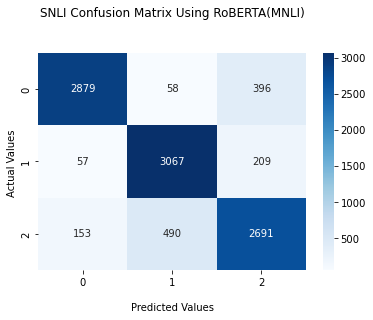

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

#Generate the confusion matrix data
cf_matrix = confusion_matrix(train_df['label1'], cnf_matrix_preds)

# output confusion matrix of actual vs. predicted values
ax = sns.heatmap(cf_matrix, annot=True, fmt='g', cmap='Blues')

ax.set_title('SNLI Confusion Matrix Using RoBERTA(MNLI)\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

### Get the F1 score

In [53]:
from sklearn.metrics import f1_score
f1_score(train_df['label1'], cnf_matrix_preds, average='micro')

0.8637